# MULTIPLE LINEAR REGRESSION

In [134]:
# importing necessary liberaries fro data manupulation
import pandas as pd
import numpy as np

# visualization liberaries
import matplotlib.pyplot as plt
import seaborn as sns

# setting graphs parameters
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

# warnings liberaries
import warnings
warnings.filterwarnings('ignore')

In [135]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/Multiple_Linear_Regression/ToyotaCorolla%20-%20MLR.csv')
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

# EDA

In [136]:
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [137]:
# descriptive_analysisi:
    # there is no missing row
    # outliers may be present in most of the columns because most of the columns are skewed

In [138]:
# it's confirm that 'KM' and 'cc' column is having outliers

In [139]:
# checking duplicated values
df.duplicated().sum()

1

In [140]:
# dropping duplicate
df.drop_duplicates(inplace=True)

In [141]:
# cross chek
df.duplicated().sum()

0

In [142]:
# frequency of unique values in each column
for col in df.columns:
    print(df[col].value_counts())
    print('--'*35)

Price
8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: count, Length: 236, dtype: int64
----------------------------------------------------------------------
Age_08_04
68    69
65    63
80    59
78    47
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: count, Length: 77, dtype: int64
----------------------------------------------------------------------
KM
36000    9
1        8
59000    7
43000    7
45000    6
        ..
63792    1
64193    1
65170    1
65471    1
16916    1
Name: count, Length: 1263, dtype: int64
----------------------------------------------------------------------
Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: int64
----------------------------------------------------------------------
HP
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      8
98       2
71       1
73       1
N

In [143]:
# check for the missing values

df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [144]:
# there is no missing values present in the dataset

In [145]:
# checking datatype of columns
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [146]:
# unique values in each columns
for col in df.columns:
    print(f'{col} is having {df[col].nunique()} unique values')
    print(f'unique values are: {df[col].unique()}')
    print('--'*35)

Price is having 236 unique values
unique values are: [13500 13750 13950 14950 12950 16900 18600 21500 20950 19950 19600 22500
 22000 22750 17950 16750 16950 15950 16250 17495 15750 15500 14750 19000
 15800 21950 20500 13250 15250 18950 15999 16500 18750 22250 12995 18450
 16895 14900 17250 15450 16650 17450 16450 18900 18990 18500 19450 18800
 32500 31000 31275 24950 22950 24990 17900 19250 16350 21750 15850 23000
 19900 23950 24500 17200 19500 16868 19750 20750 17650 17795 18245 23750
 18700 21125  6950  9500 11950  7750  4350  4750 11750 11900  9950 11495
 11250 10500 10450 11500 12500 10950 11450 11790 12450 11690 12750 11925
 12900 11650 10850  9940 13450 12495 12000 11480 14990 12850 11700 11895
 13875 12295 13995  9900 11990 10750 11695 11000 12400 12200 12695 14350
 10250  6500  6400  7000  8900  8500  8950  9250  9450  8250  4450  9000
  5150  7900 10900  9750 11290 10895 10995  9850  8695 10990  8750  9930
  9799  9700  9990  9475 10000 10495  9400  9650  9550 13000 11710  998

In [147]:
df.shape

(1435, 11)

In [148]:
# extracting numerical column list

col_list = df.drop(columns='Fuel_Type').columns.to_list()
col_list

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

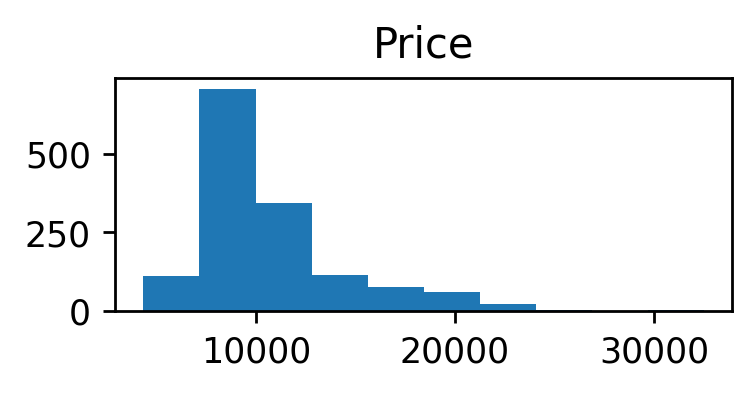

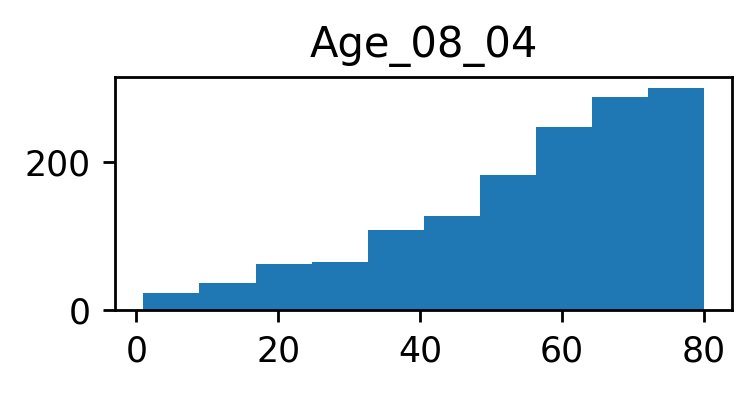

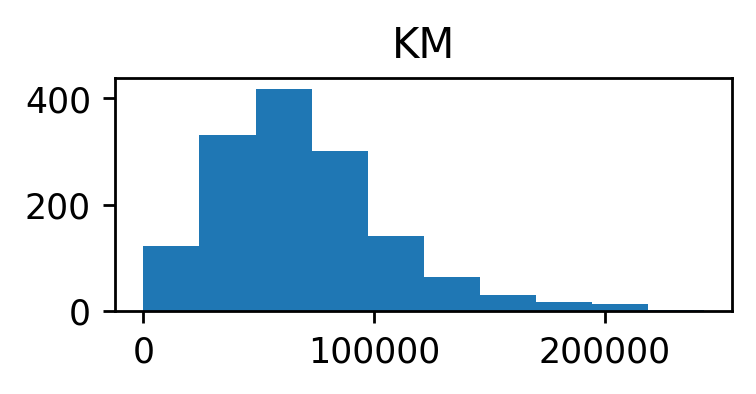

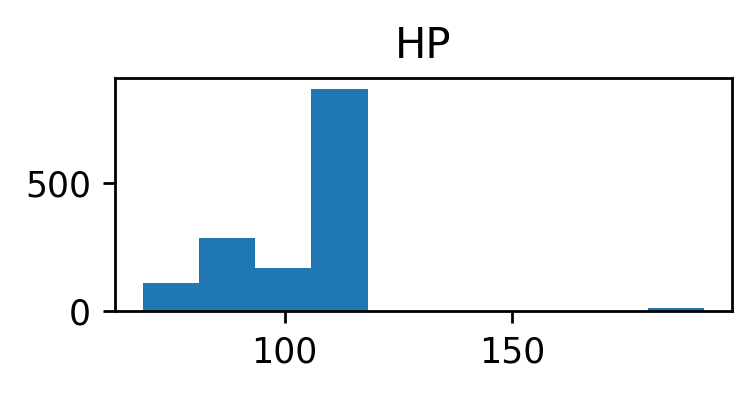

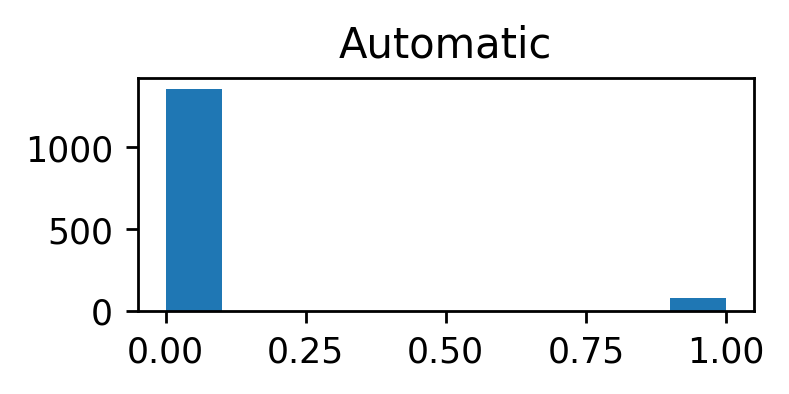

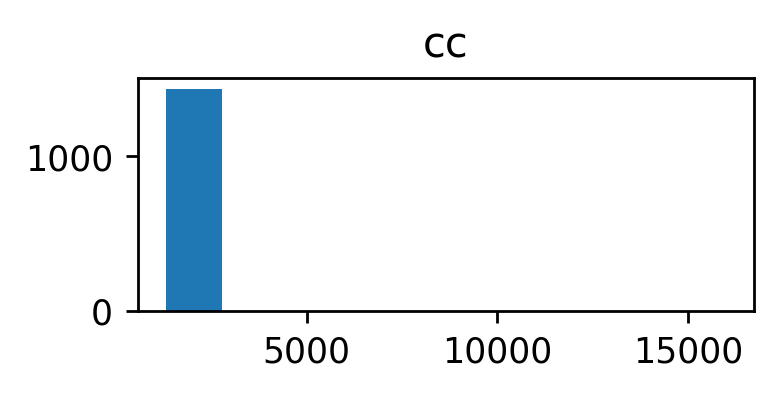

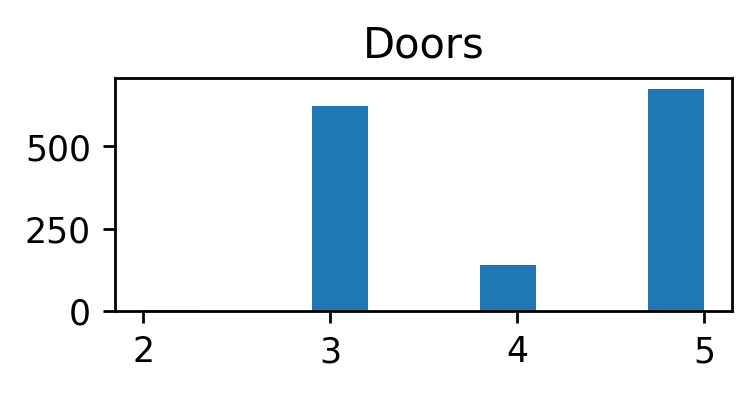

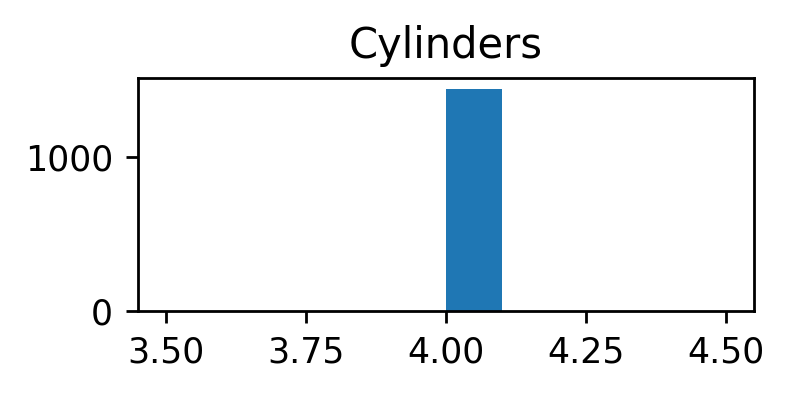

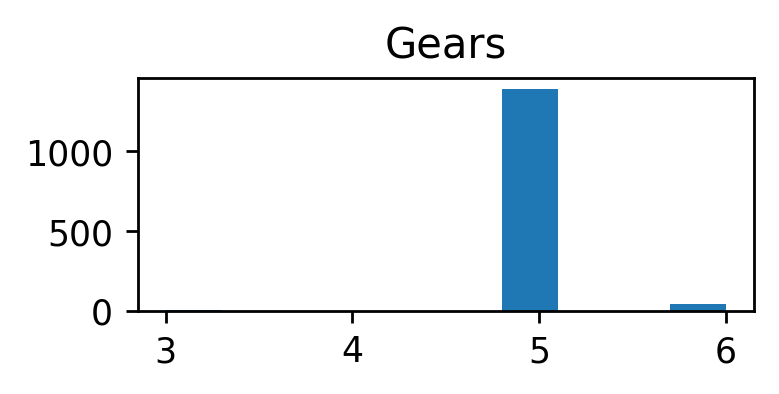

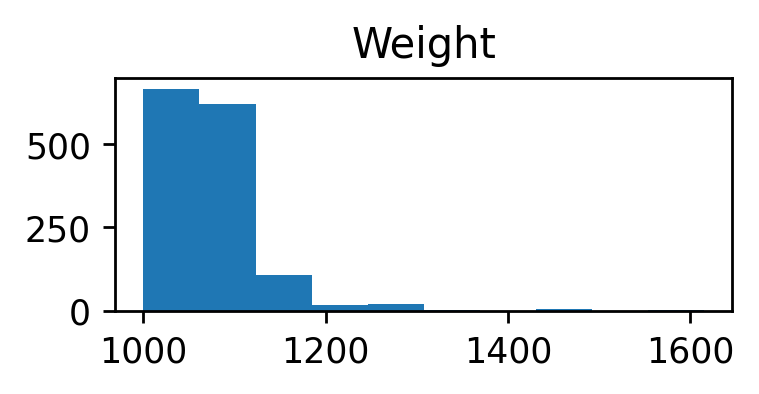

In [149]:
# I am plotting histogram to see the distribution of each column by using for loop
for i in col_list:
    plt.rcParams['figure.figsize'] = (7,7)
    plt.subplot(5,2,col_list.index(i)+1)
    plt.hist(df[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Fuel_Type', ylabel='count'>

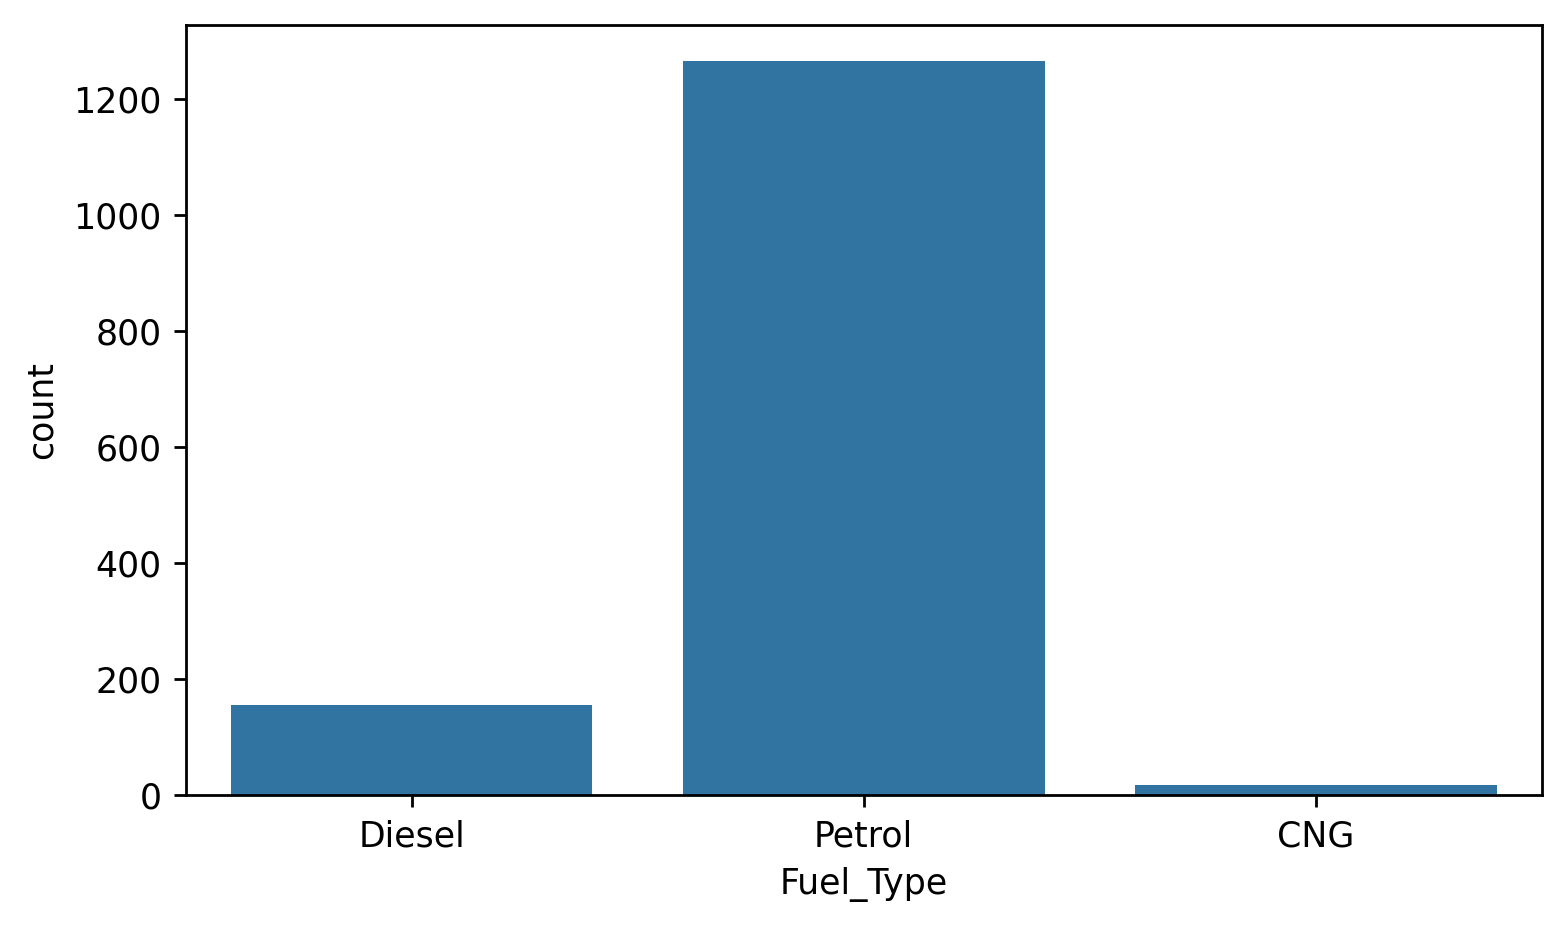

In [150]:
# plotting countplot for Fuel_Type column
plt.rcParams['figure.figsize'] = (7,4)
sns.countplot(x=df['Fuel_Type'])

petrol vehicles are the highest among these three types of vehicles

# data transformation

In [151]:
df.head(3)

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165

### one hot encoding

In [152]:
# Fuel_Type column is having text data type so I need to perform one_hot_edcoding

In [153]:
df = pd.get_dummies(df, columns=['Fuel_Type'], dtype=int)
df

Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500         23  46986   90          0  2000      3          4      5   
1     13750         23  72937   90          0  2000      3          4      5   
2     13950         24  41711   90          0  2000      3          4      5   
3     14950         26  48000   90          0  2000      3          4      5   
4     13750         30  38500   90          0  2000      3          4      5   
...     ...        ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500         69  20544   86          0  1300      3          4      5   
1432  10845         72  19000   86          0  1300      3          4      5   
1433   8500         71  17016   86          0  1300      3          4      5   
1434   7250         70  16916   86          0  1300      3          4      5   
1435   6950         76      1  110          0  1600      5          4      5   

      Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0       1165              0                 1                 0  
1       1165              0                 1                 0  
2       1165              0                 1                 0  
3       1165              0                 1                 0  
4       1170              0                 1                 0  
...      ...            ...               ...               ...  
1431    1025              0                 0                 1  
1432    1015              0                 0                 1  
1433    1015              0                 0                 1  
1434    1015              0                 0                 1  
1435    1114              0                 0                 1  

[1435 rows x 13 columns]

# Feature scaling

In [154]:
x = df.iloc[:, 1:]
x

Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  Weight  \
0            23  46986   90          0  2000      3          4      5    1165   
1            23  72937   90          0  2000      3          4      5    1165   
2            24  41711   90          0  2000      3          4      5    1165   
3            26  48000   90          0  2000      3          4      5    1165   
4            30  38500   90          0  2000      3          4      5    1170   
...         ...    ...  ...        ...   ...    ...        ...    ...     ...   
1431         69  20544   86          0  1300      3          4      5    1025   
1432         72  19000   86          0  1300      3          4      5    1015   
1433         71  17016   86          0  1300      3          4      5    1015   
1434         70  16916   86          0  1300      3          4      5    1015   
1435         76      1  110          0  1600      5          4      5    1114   

      Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0                 0                 1                 0  
1                 0                 1                 0  
2                 0                 1                 0  
3                 0                 1                 0  
4                 0                 1                 0  
...             ...               ...               ...  
1431              0                 0                 1  
1432              0                 0                 1  
1433              0                 0                 1  
1434              0                 0                 1  
1435              0                 0                 1  

[1435 rows x 12 columns]

In [155]:
y = df[['Price']]
y

Price
0     13500
1     13750
2     13950
3     14950
4     13750
...     ...
1431   7500
1432  10845
1433   8500
1434   7250
1435   6950

[1435 rows x 1 columns]

In [156]:
# standardization

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
st = StandardScaler()

In [159]:
st_x = st.fit_transform(x)
st_x

array([[-1.77726827, -0.57595832, -0.76735061, ..., -0.109493  ,
         2.88412583, -2.71878886],
       [-1.77726827,  0.11647404, -0.76735061, ..., -0.109493  ,
         2.88412583, -2.71878886],
       [-1.72337979, -0.71670745, -0.76735061, ..., -0.109493  ,
         2.88412583, -2.71878886],
       ...,
       [ 0.80937864, -1.37562683, -1.03444129, ..., -0.109493  ,
        -0.34672551,  0.36781083],
       [ 0.75549016, -1.37829506, -1.03444129, ..., -0.109493  ,
        -0.34672551,  0.36781083],
       [ 1.07882103, -1.82962616,  0.56810282, ..., -0.109493  ,
        -0.34672551,  0.36781083]])

In [160]:
x = pd.DataFrame(st_x, columns=x.columns)    #converting to dataframe
x

Age_08_04        KM        HP  Automatic        cc     Doors  Cylinders  \
0     -1.777268 -0.575958 -0.767351  -0.242983  0.998113 -1.084443        0.0   
1     -1.777268  0.116474 -0.767351  -0.242983  0.998113 -1.084443        0.0   
2     -1.723380 -0.716707 -0.767351  -0.242983  0.998113 -1.084443        0.0   
3     -1.615603 -0.548902 -0.767351  -0.242983  0.998113 -1.084443        0.0   
4     -1.400049 -0.802384 -0.767351  -0.242983  0.998113 -1.084443        0.0   
...         ...       ...       ...        ...       ...       ...        ...   
1430   0.701602 -1.281492 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
1431   0.863267 -1.322689 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
1432   0.809379 -1.375627 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
1433   0.755490 -1.378295 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
1434   1.078821 -1.829626  0.568103  -0.242983  0.055249  1.015659        0.0   

         Gears    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    -0.140475  1.774964      -0.109493          2.884126         -2.718789  
1    -0.140475  1.774964      -0.109493          2.884126         -2.718789  
2    -0.140475  1.774964      -0.109493          2.884126         -2.718789  
3    -0.140475  1.774964      -0.109493          2.884126         -2.718789  
4    -0.140475  1.870688      -0.109493          2.884126         -2.718789  
...        ...       ...            ...               ...               ...  
1430 -0.140475 -0.905299      -0.109493         -0.346726          0.367811  
1431 -0.140475 -1.096747      -0.109493         -0.346726          0.367811  
1432 -0.140475 -1.096747      -0.109493         -0.346726          0.367811  
1433 -0.140475 -1.096747      -0.109493         -0.346726          0.367811  
1434 -0.140475  0.798582      -0.109493         -0.346726          0.367811  

[1435 rows x 12 columns]

## model builiding

In [161]:
# splitting in training and testing

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80, random_state=42)

In [164]:
xtrain

Age_08_04        KM        HP  Automatic        cc     Doors  Cylinders  \
1127   1.186598  1.085735  0.568103  -0.242983  0.055249  1.015659        0.0   
898    0.324382 -0.247526 -1.034441  -0.242983 -0.651898  1.015659        0.0   
1187   0.809379  0.581627 -1.034441  -0.242983 -0.651898  1.015659        0.0   
310   -0.645610 -0.803425  0.568103  -0.242983  0.055249  1.015659        0.0   
1144   1.024933  0.888073  0.568103  -0.242983  0.055249  1.015659        0.0   
...         ...       ...       ...        ...       ...       ...        ...   
1095   1.024933  1.516308  0.568103  -0.242983  0.055249 -1.084443        0.0   
1130   1.024933  1.025353  0.568103  -0.242983  0.055249 -1.084443        0.0   
1294   1.294375  0.078132  0.568103  -0.242983  0.055249 -0.034392        0.0   
860    0.486048 -0.105176  0.568103  -0.242983  0.055249  1.015659        0.0   
1126   1.024933  1.093126  0.568103  -0.242983  0.055249  1.015659        0.0   

         Gears    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
1127 -0.140475 -0.043786      -0.109493         -0.346726          0.367811  
898  -0.140475 -0.713852      -0.109493         -0.346726          0.367811  
1187 -0.140475 -0.713852      -0.109493         -0.346726          0.367811  
310  -0.140475  0.147661      -0.109493         -0.346726          0.367811  
1144 -0.140475 -0.043786      -0.109493         -0.346726          0.367811  
...        ...       ...            ...               ...               ...  
1095 -0.140475 -0.426681      -0.109493         -0.346726          0.367811  
1130 -0.140475 -0.426681      -0.109493         -0.346726          0.367811  
1294 -0.140475 -0.713852      -0.109493         -0.346726          0.367811  
860  -0.140475 -0.043786      -0.109493         -0.346726          0.367811  
1126 -0.140475  0.243385      -0.109493         -0.346726          0.367811  

[1148 rows x 12 columns]

In [165]:
xtest

Age_08_04        KM        HP  Automatic        cc     Doors  Cylinders  \
752    0.162717  0.316405  0.568103  -0.242983  0.055249 -1.084443        0.0   
857    0.324382 -0.100720  0.568103  -0.242983  0.055249  1.015659        0.0   
629    0.162717  1.639046 -1.969259  -0.242983  0.998113 -0.034392        0.0   
1411   0.701602 -0.687650  0.568103  -0.242983  0.055249 -1.084443        0.0   
974    0.486048 -0.575211 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
...         ...       ...       ...        ...       ...       ...        ...   
1112   0.917156  1.262212  0.568103  -0.242983  0.055249 -0.034392        0.0   
174   -2.585595 -1.600879  0.568103  -0.242983  0.055249  1.015659        0.0   
1427   0.863267 -1.135913 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
297   -1.130607 -0.735679  0.568103  -0.242983  0.055249  1.015659        0.0   
1125   1.294375  1.105400  0.568103  -0.242983  0.055249 -0.034392        0.0   

         Gears    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
752   5.164307 -0.139510      -0.109493         -0.346726          0.367811  
857  -0.140475  0.051938      -0.109493         -0.346726          0.367811  
629  -0.140475  1.200622      -0.109493          2.884126         -2.718789  
1411 -0.140475 -0.426681      -0.109493         -0.346726          0.367811  
974  -0.140475 -1.096747      -0.109493         -0.346726          0.367811  
...        ...       ...            ...               ...               ...  
1112 -0.140475 -0.713852      -0.109493         -0.346726          0.367811  
174  -0.140475  1.104898      -0.109493         -0.346726          0.367811  
1427 -0.140475 -1.096747      -0.109493         -0.346726          0.367811  
297  -0.140475  0.051938      -0.109493         -0.346726          0.367811  
1125 -0.140475 -0.713852      -0.109493         -0.346726          0.367811  

[287 rows x 12 columns]

In [166]:
ytrain

Price
1128   7500
899    9500
1188   7950
311   13995
1145   6450
...     ...
1096   7900
1131   9950
1295   7500
861   10950
1127   8700

[1148 rows x 1 columns]

In [167]:
ytest

Price
753    9950
858    7995
630    7500
1412   9950
975    8950
...     ...
1113   5750
175   19950
1428   8450
298   13995
1126   6800

[287 rows x 1 columns]

In [168]:
# concatinating xtrain and ytrain(target column) data to get a complete training dataset

In [169]:
train_data = pd.concat([xtrain, ytrain], axis=1)
train_data

Age_08_04        KM        HP  Automatic        cc     Doors  Cylinders  \
1127   1.186598  1.085735  0.568103  -0.242983  0.055249  1.015659        0.0   
898    0.324382 -0.247526 -1.034441  -0.242983 -0.651898  1.015659        0.0   
1187   0.809379  0.581627 -1.034441  -0.242983 -0.651898  1.015659        0.0   
310   -0.645610 -0.803425  0.568103  -0.242983  0.055249  1.015659        0.0   
1144   1.024933  0.888073  0.568103  -0.242983  0.055249  1.015659        0.0   
...         ...       ...       ...        ...       ...       ...        ...   
316         NaN       NaN       NaN        NaN       NaN       NaN        NaN   
857         NaN       NaN       NaN        NaN       NaN       NaN        NaN   
1338        NaN       NaN       NaN        NaN       NaN       NaN        NaN   
277         NaN       NaN       NaN        NaN       NaN       NaN        NaN   
344         NaN       NaN       NaN        NaN       NaN       NaN        NaN   

         Gears    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  \
1127 -0.140475 -0.043786      -0.109493         -0.346726          0.367811   
898  -0.140475 -0.713852      -0.109493         -0.346726          0.367811   
1187 -0.140475 -0.713852      -0.109493         -0.346726          0.367811   
310  -0.140475  0.147661      -0.109493         -0.346726          0.367811   
1144 -0.140475 -0.043786      -0.109493         -0.346726          0.367811   
...        ...       ...            ...               ...               ...   
316        NaN       NaN            NaN               NaN               NaN   
857        NaN       NaN            NaN               NaN               NaN   
1338       NaN       NaN            NaN               NaN               NaN   
277        NaN       NaN            NaN               NaN               NaN   
344        NaN       NaN            NaN               NaN               NaN   

        Price  
1127   8700.0  
898    8950.0  
1187   7450.0  
310   12950.0  
1144   7750.0  
...       ...  
316   12950.0  
857    8500.0  
1338   7499.0  
277   11495.0  
344   12950.0  

[1366 rows x 13 columns]

In [170]:
# model building

In [171]:
import statsmodels.formula.api as smf

In [172]:
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol', data=train_data).fit()

In [173]:
model.params            #intercept and slop value of each independent variable

Intercept           1.076527e+04
Age_08_04          -2.376252e+03
KM                 -5.728907e+02
HP                  1.024308e+02
Automatic          -1.456920e+02
cc                  7.690083e+00
Doors              -2.175454e+02
Cylinders           7.988628e-14
Gears              -3.147381e+01
Weight              1.145507e+03
Fuel_Type_CNG      -3.890440e+01
Fuel_Type_Diesel   -2.589825e+02
Fuel_Type_Petrol    2.604118e+02
dtype: float64

In [174]:
# checking multicolinearity

In [175]:
model.pvalues

Intercept            0.000000e+00
Age_08_04           1.086606e-158
KM                   1.631806e-14
HP                   1.713306e-01
Automatic            1.266543e-02
cc                   8.679141e-01
Doors                1.364370e-04
Cylinders            9.659367e-02
Gears                5.739252e-01
Weight               3.337720e-29
Fuel_Type_CNG        4.623066e-01
Fuel_Type_Diesel     7.514210e-06
Fuel_Type_Petrol     8.141531e-07
dtype: float64

### conclusion
 these are the pvalues for each column and all the pvalues are less than alpha value(0.5)
 that means there is no multicolinearity between the independent features
 and all of the independent features are important for analysis because their slow value is not 0.

In [176]:
model.rsquared                  #checking accuracy

0.8296944542504328

In [177]:
print(f'accuracy of the model is:  {model.rsquared}')

accuracy of the model is:  0.8296944542504328


### checking assumptions about the error datapoint

In [178]:
import statsmodels.api as sm

In [179]:
model.fittedvalues               #getting the predicted values that model calculated in backend

1127     7340.768392
898      9216.270505
1187     7588.783109
310     12996.144341
1144     7838.165272
            ...     
121     17581.610081
1044     5410.013683
1095     7496.514452
1130     7777.777620
1294     7122.778741
Length: 930, dtype: float64

In [180]:
errors = model.resid           #error calculated by the model
errors

1127    1359.231608
898     -266.270505
1187    -138.783109
310      -46.144341
1144     -88.165272
           ...     
121     2368.389919
1044     489.986317
1095    -596.514452
1130     172.222380
1294    -172.778741
Length: 930, dtype: float64

# CHECK ASSUMPTIONS ABOUT ERROR DATAPOINTS

## 1st assumption for errordatapoints:
### IID Normal distribution

In [181]:
# QQPLOT for check normal distribution of error datapoints

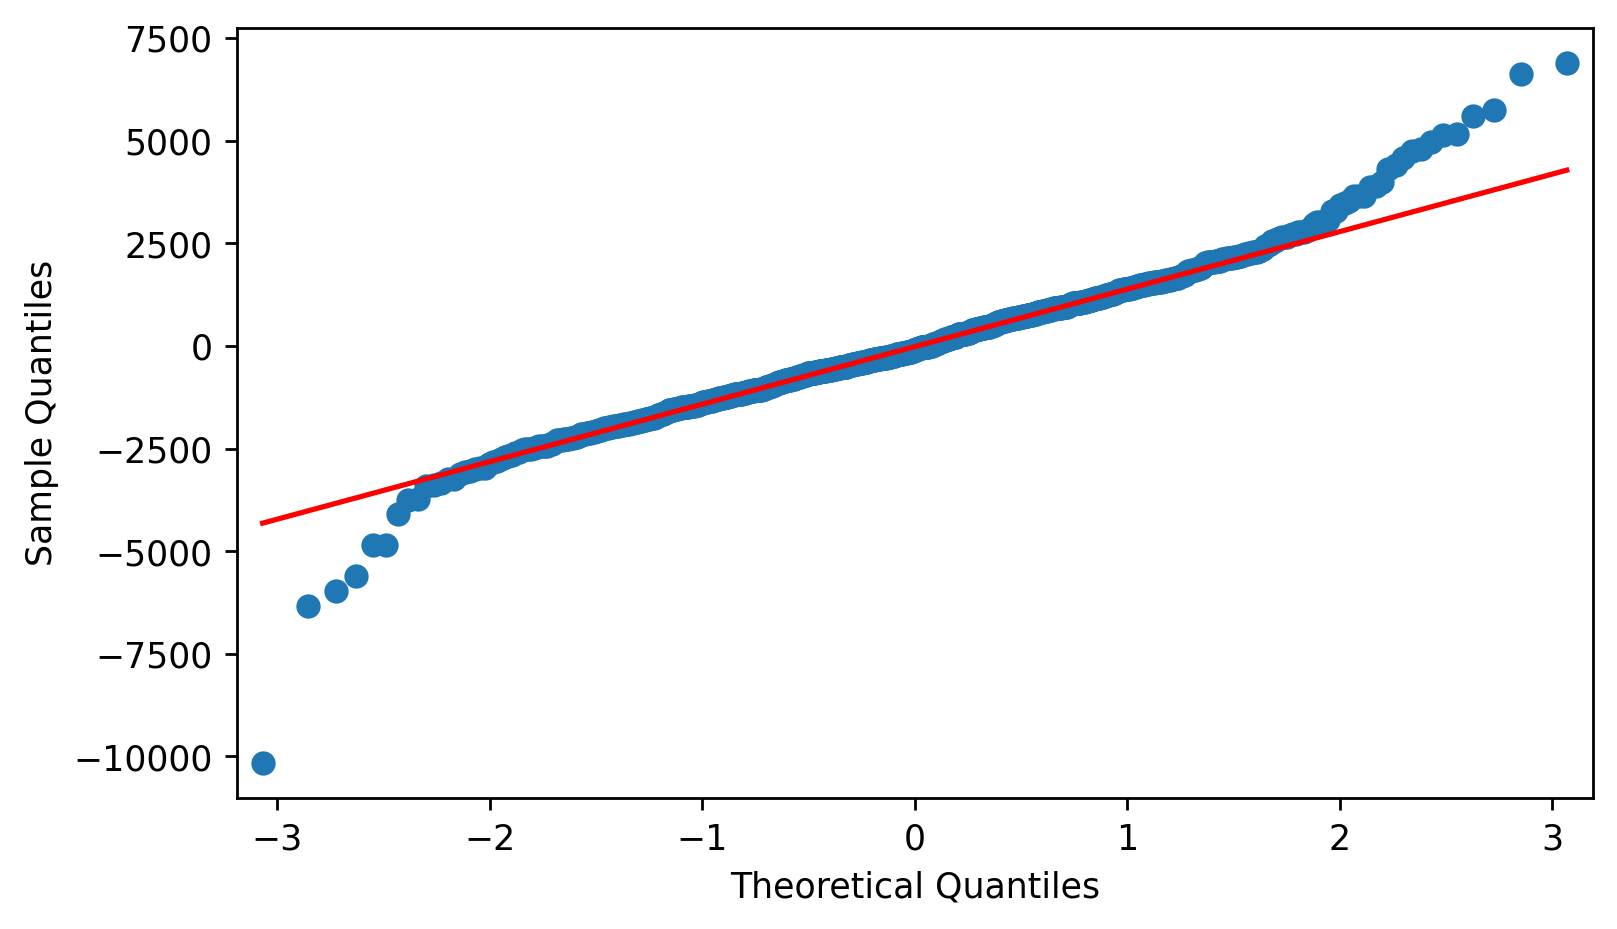

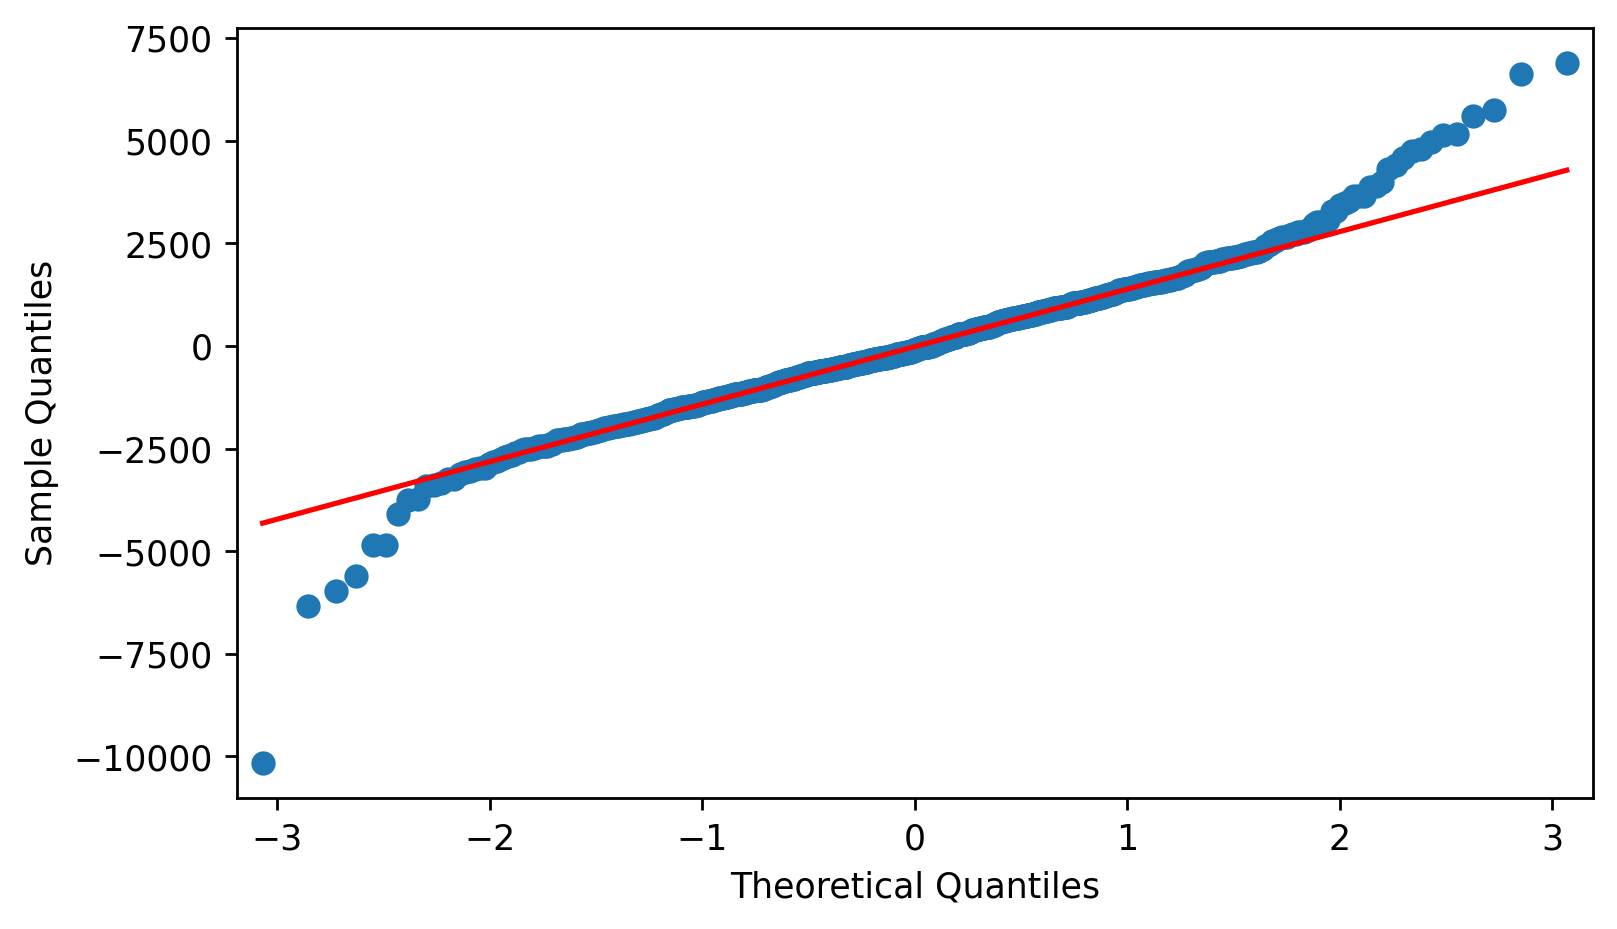

In [182]:
sm.qqplot(errors, line='q')

In [183]:
# there are 2 outliers present in the lower side

In [184]:
# row number of error datapoints and error

In [185]:
df_error = pd.DataFrame(errors,columns=['error'])
df_error = df_error.sort_values(by='error')
df_error

error
959 -10154.731378
393  -6346.629195
191  -5968.010735
402  -5613.912062
186  -4853.942731
..            ...
110   5175.039839
138   5597.733691
125   5752.625788
109   6613.910958
147   6898.264676

[930 rows x 1 columns]

In [186]:
# row 960 and 601 are outlier datapoints

# 2rd assumption for error datapoints:
###  HOMOSCEDASTICITY

Text(0.5, 1.0, 'constant variance')

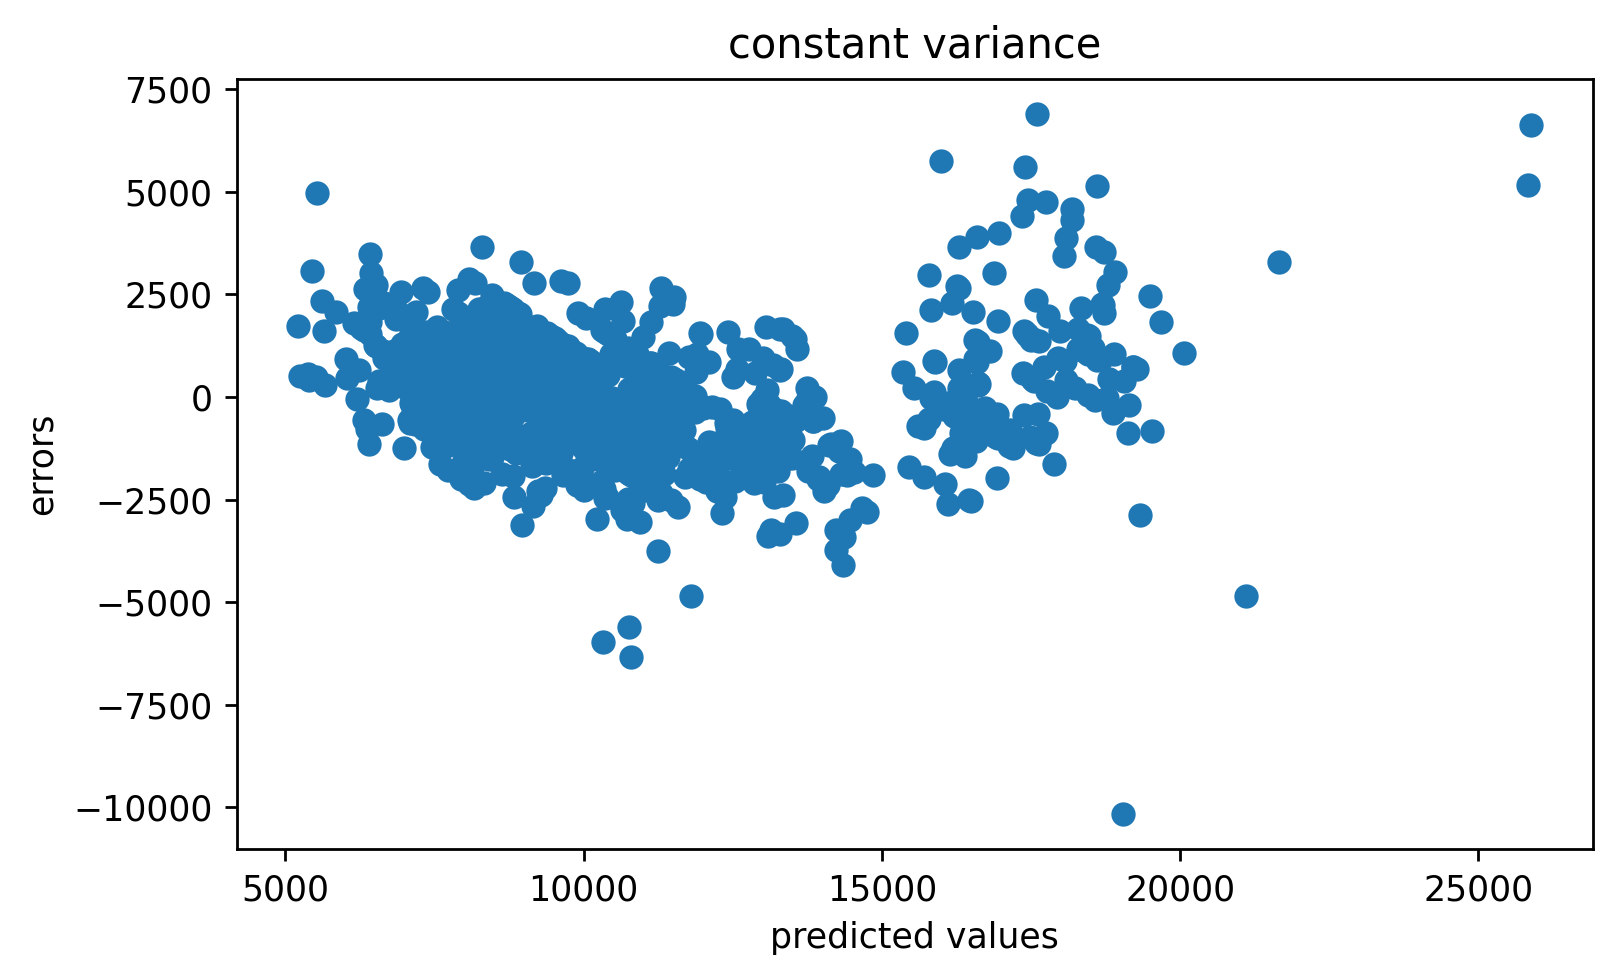

In [187]:
plt.scatter(model.fittedvalues, errors)
plt.xlabel('predicted values')
plt.ylabel('errors')
plt.title('constant variance')

# 3rd assumption for error datapoints:
### MEAN = 0

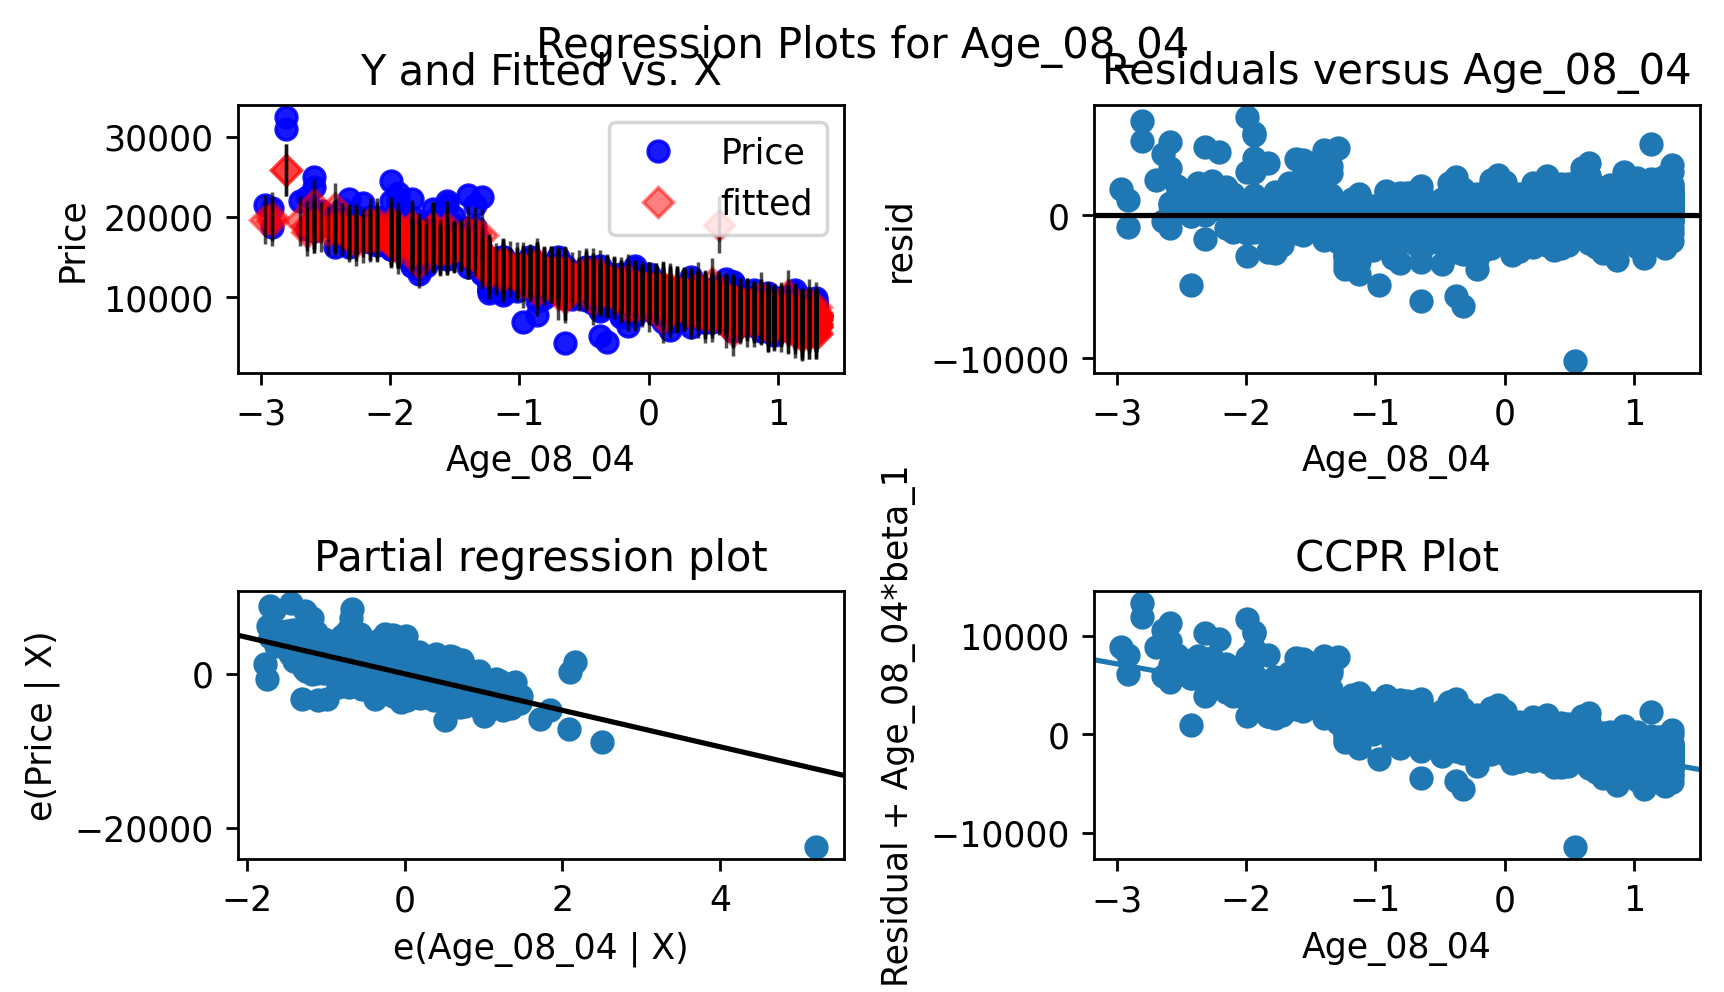

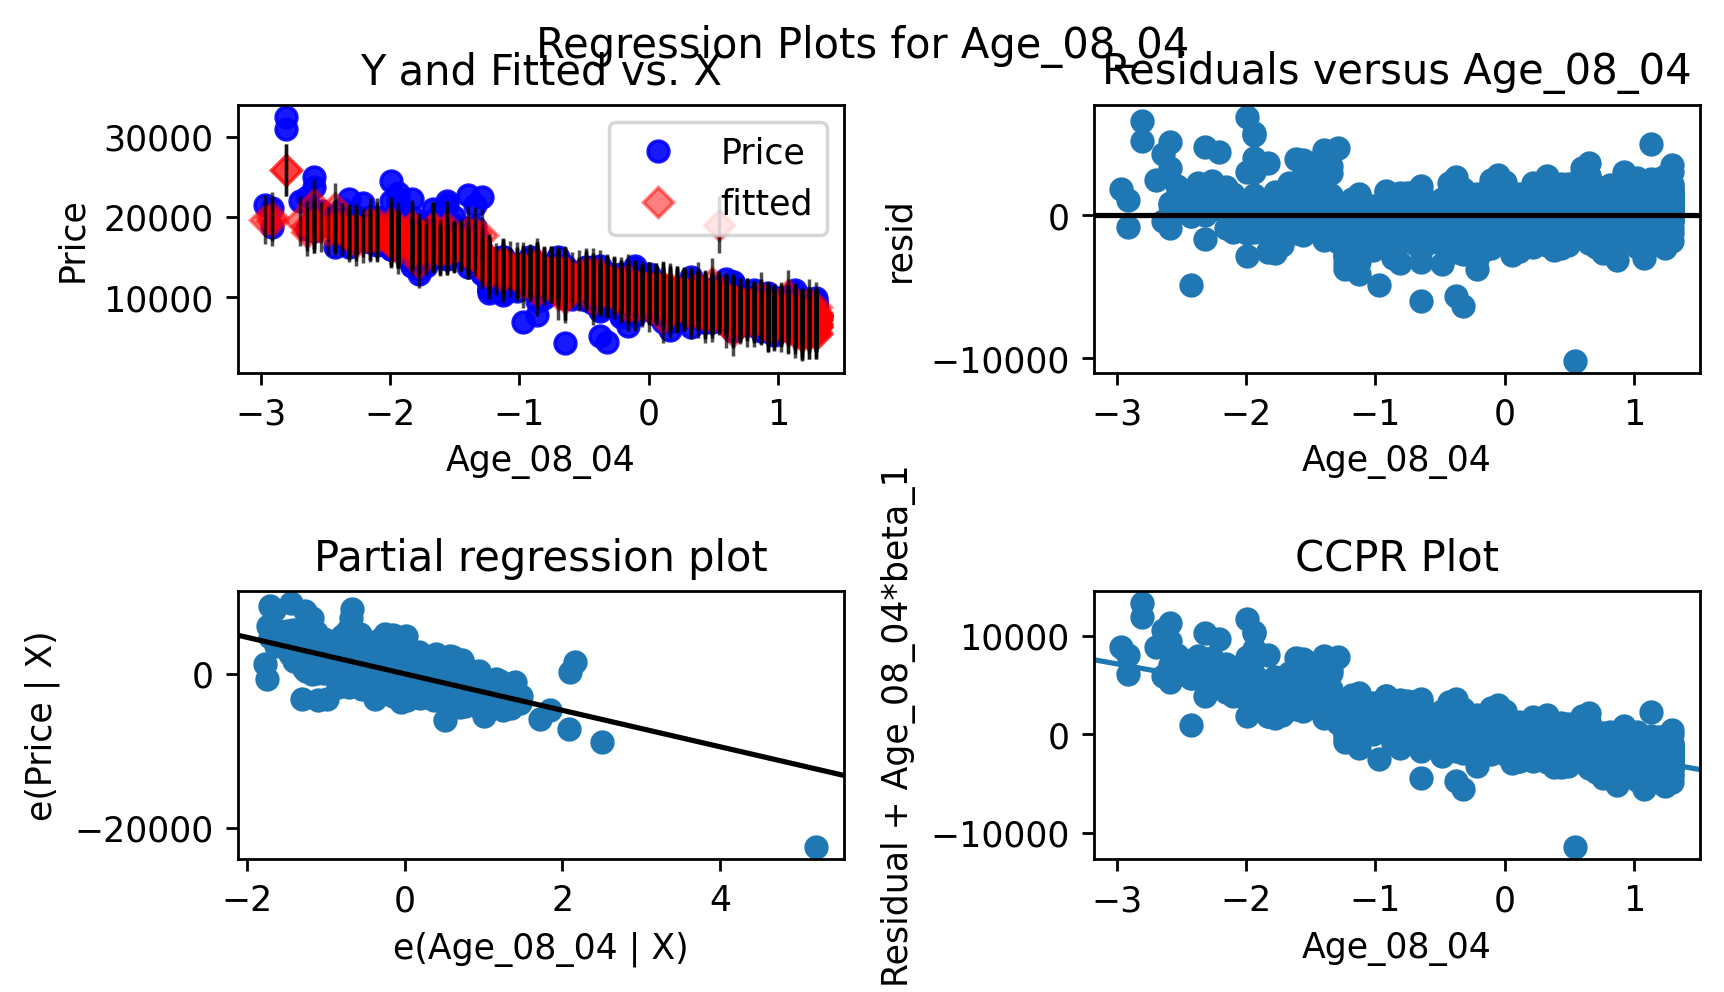

In [188]:
sm.graphics.plot_regress_exog(model, 'Age_08_04')

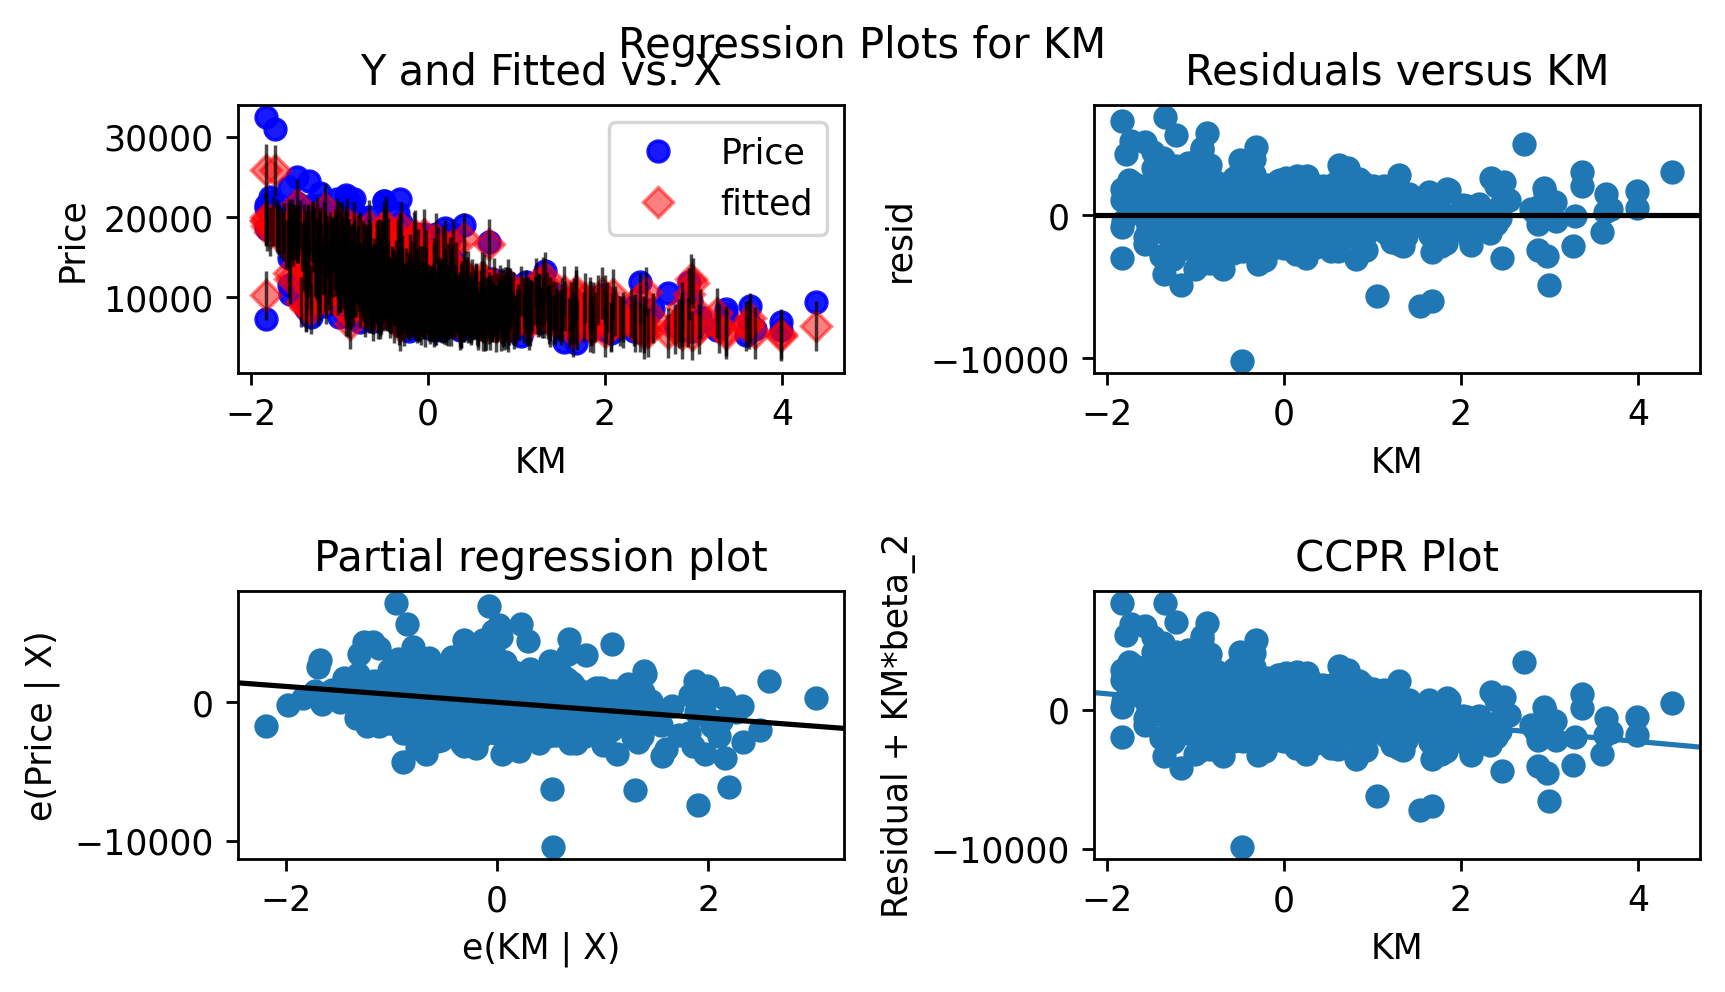

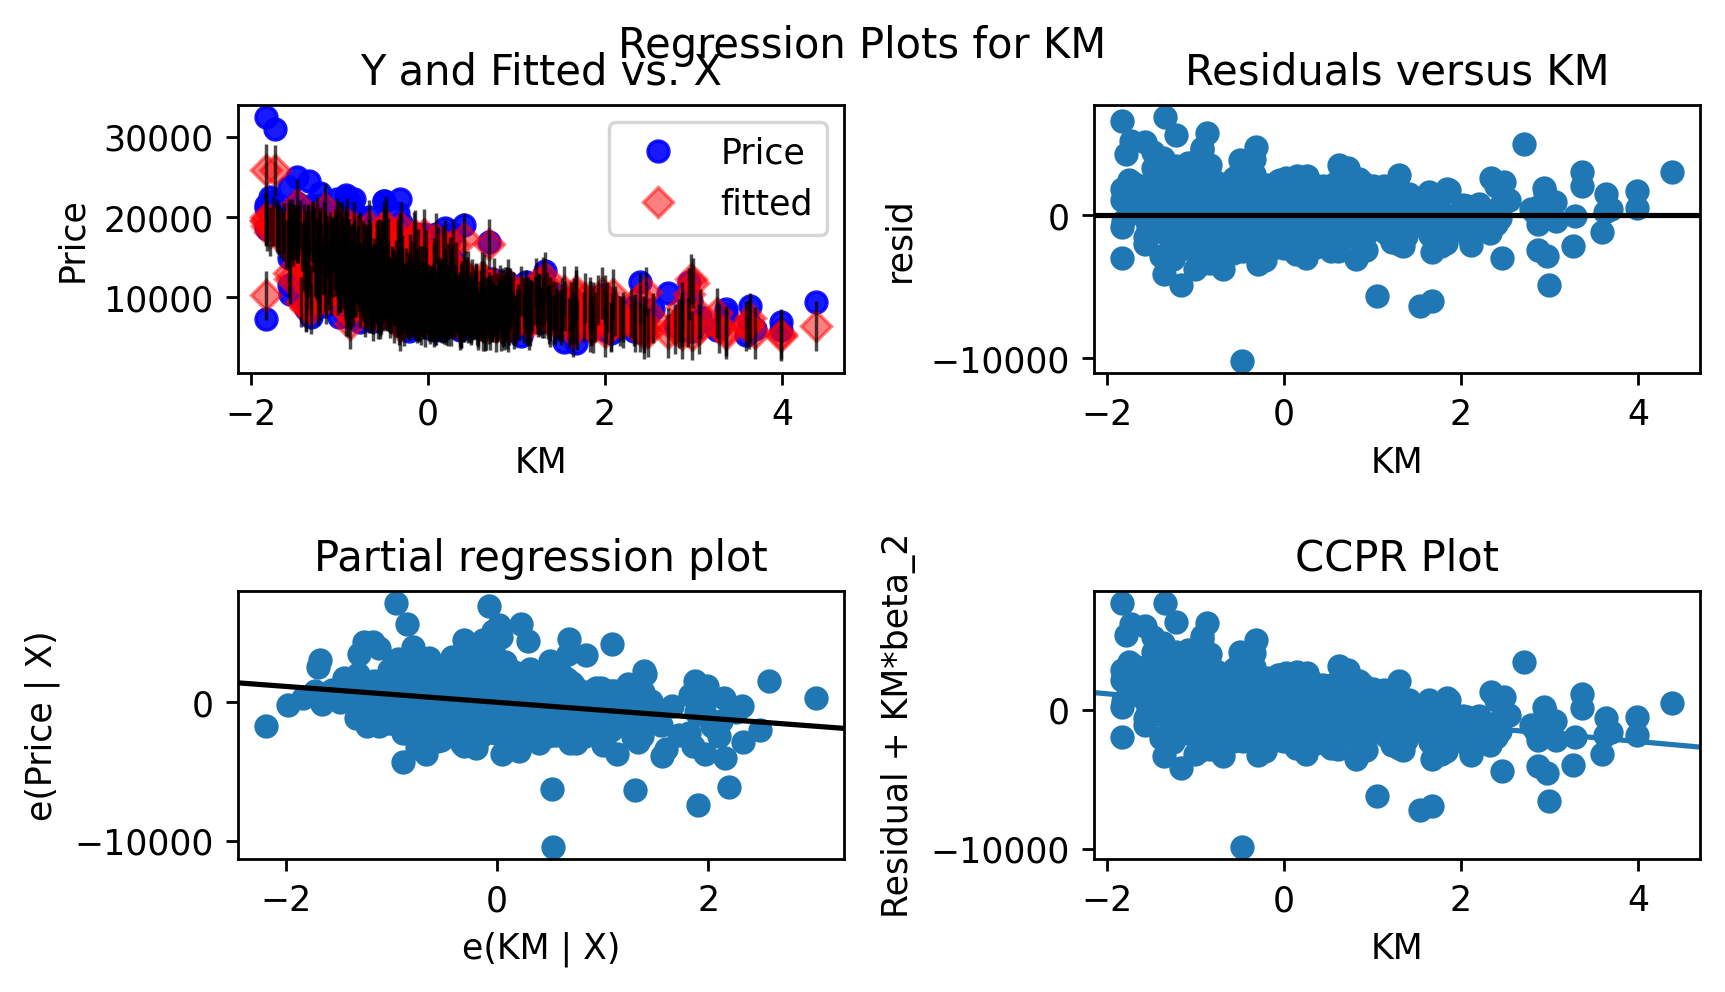

In [189]:
sm.graphics.plot_regress_exog(model, 'KM')

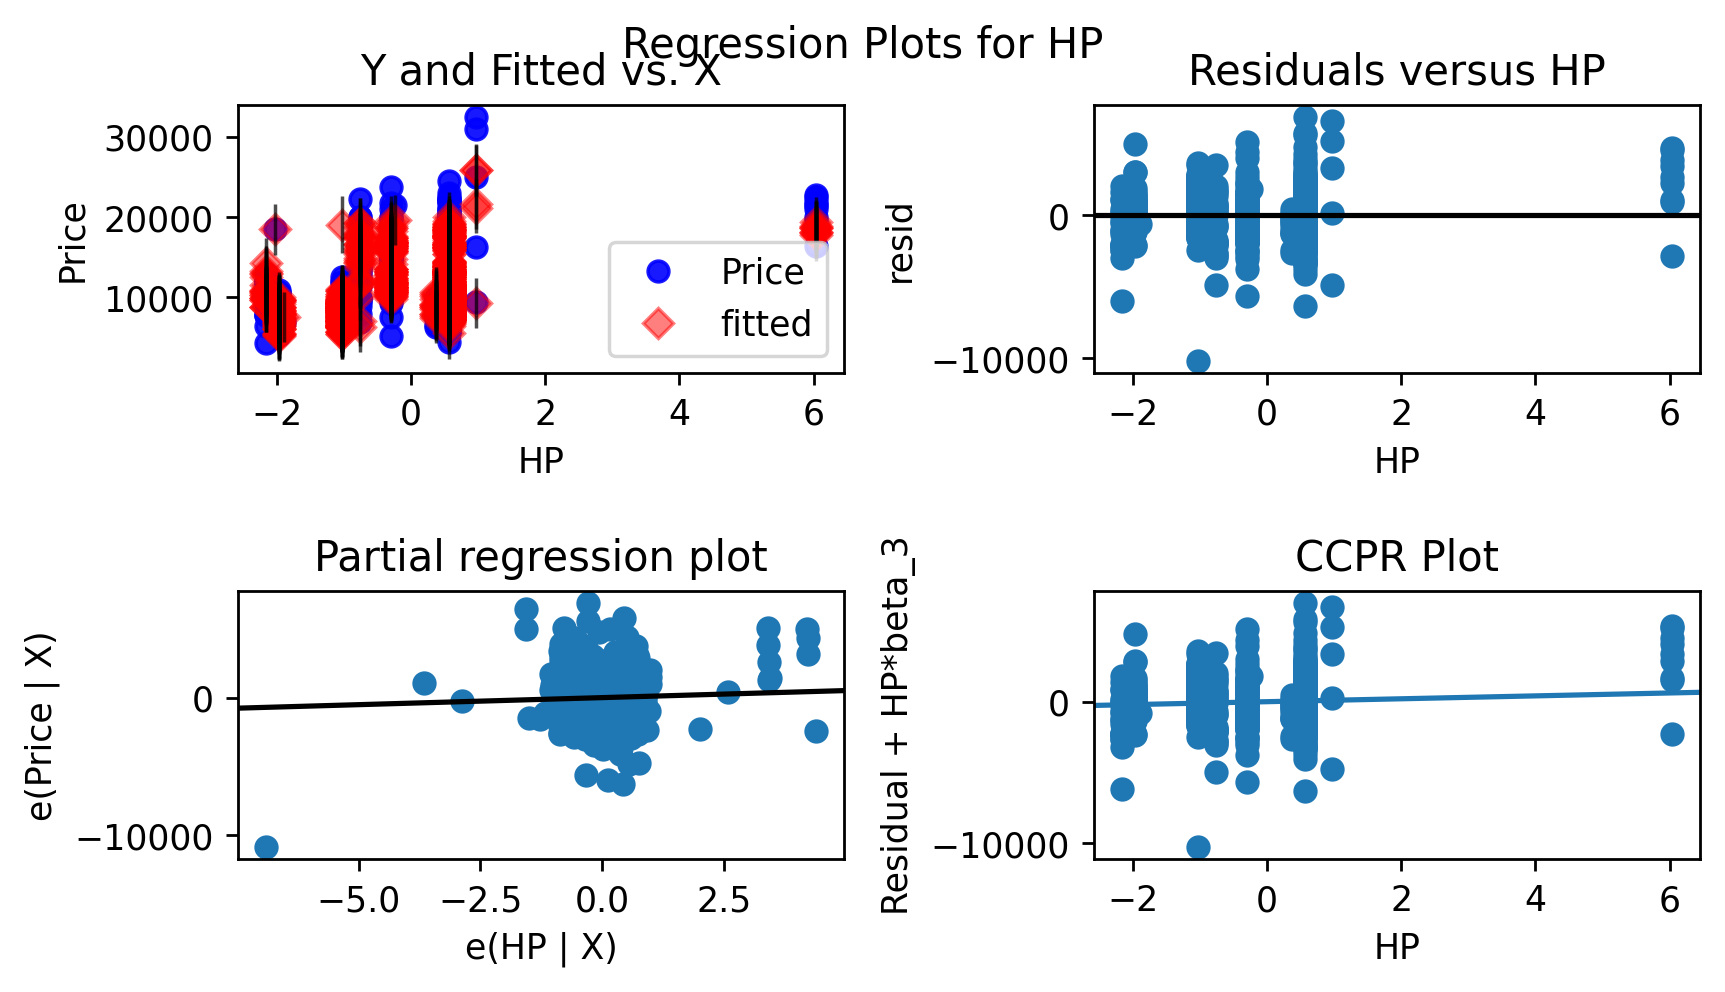

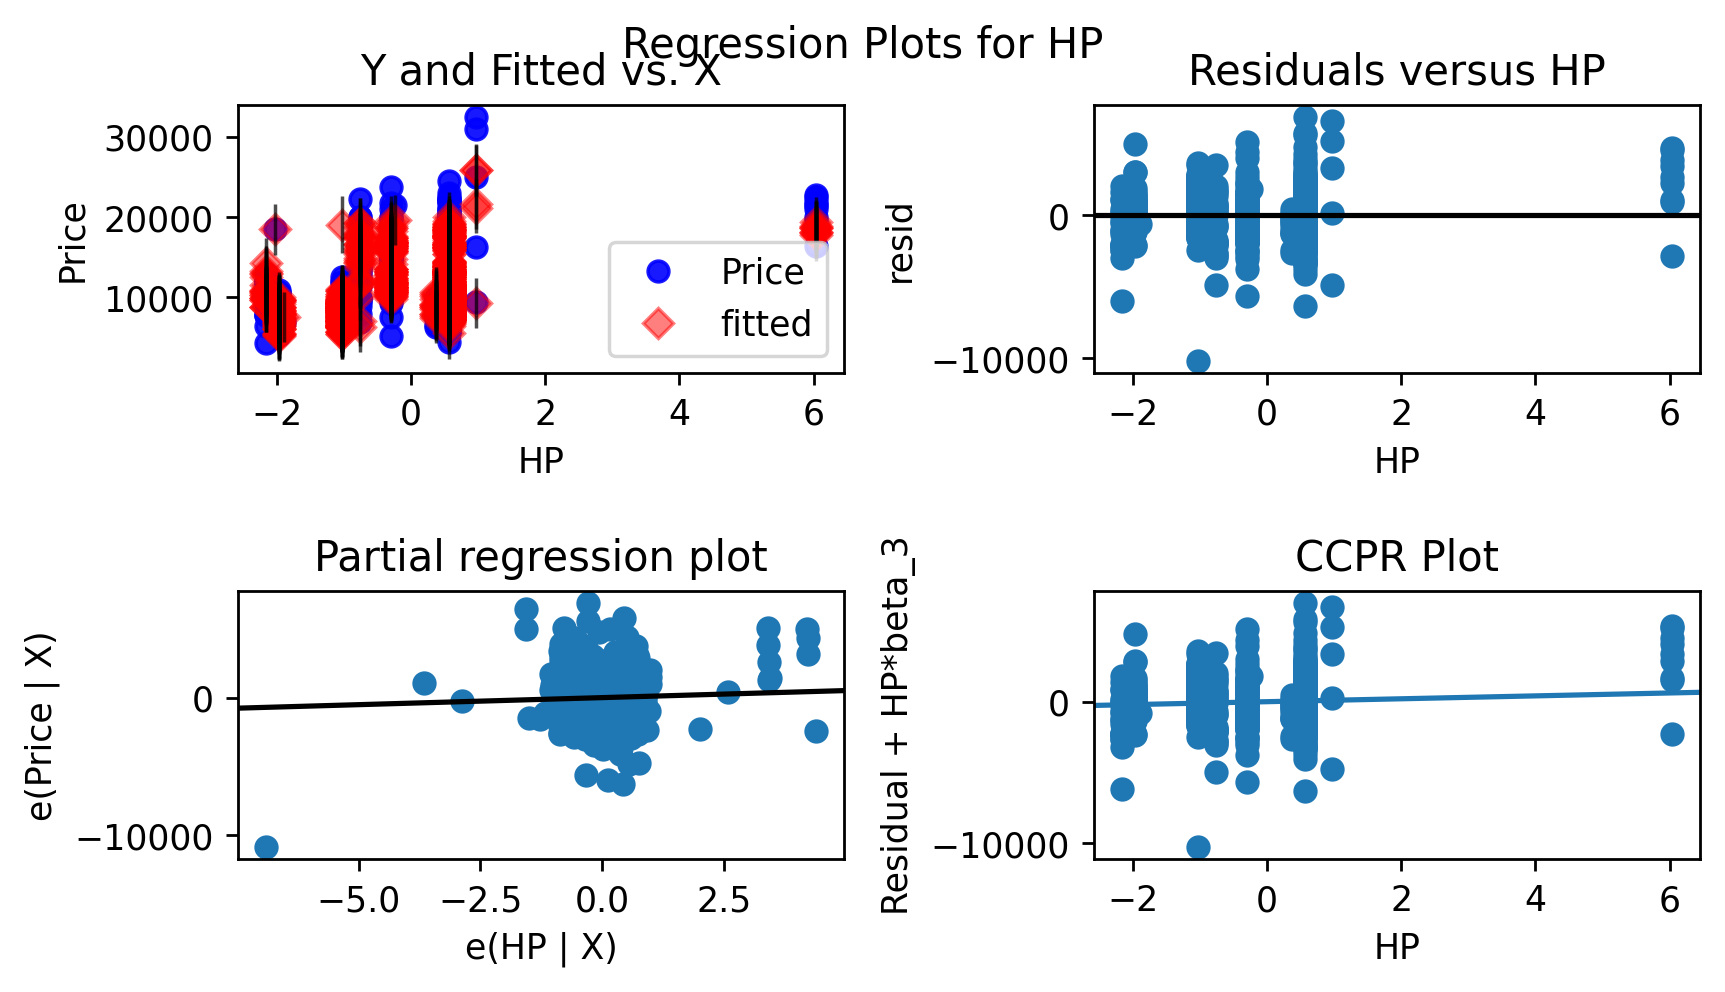

In [190]:
sm.graphics.plot_regress_exog(model, 'HP')

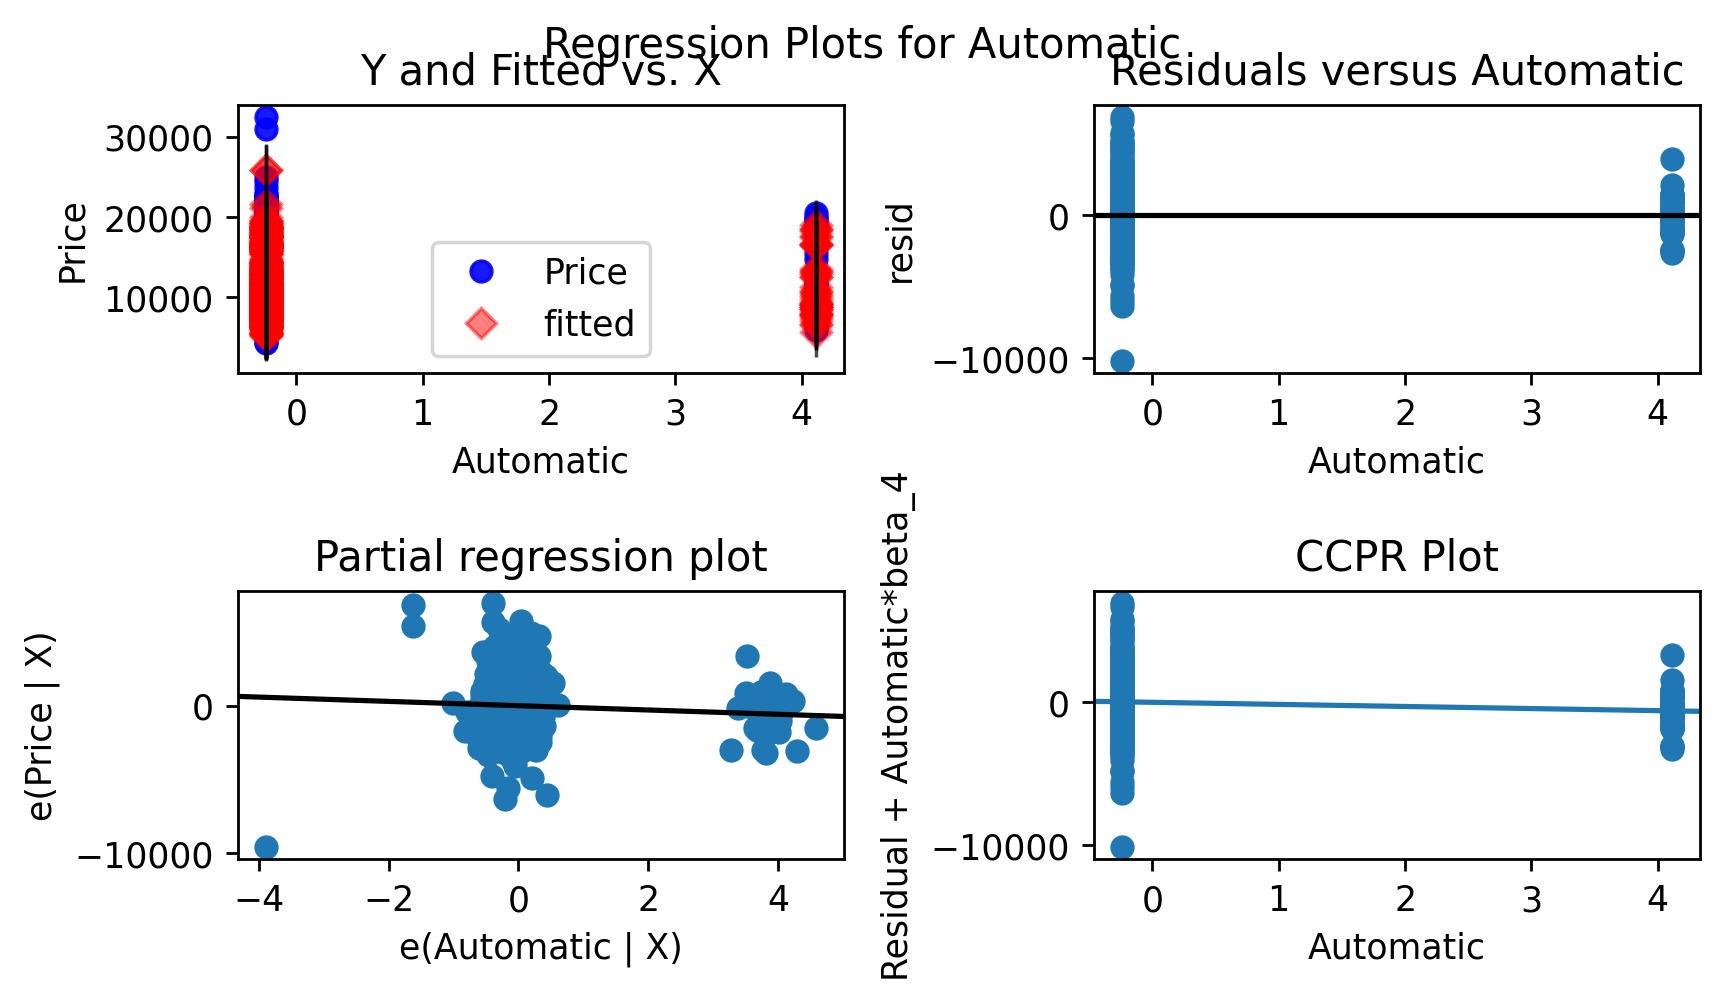

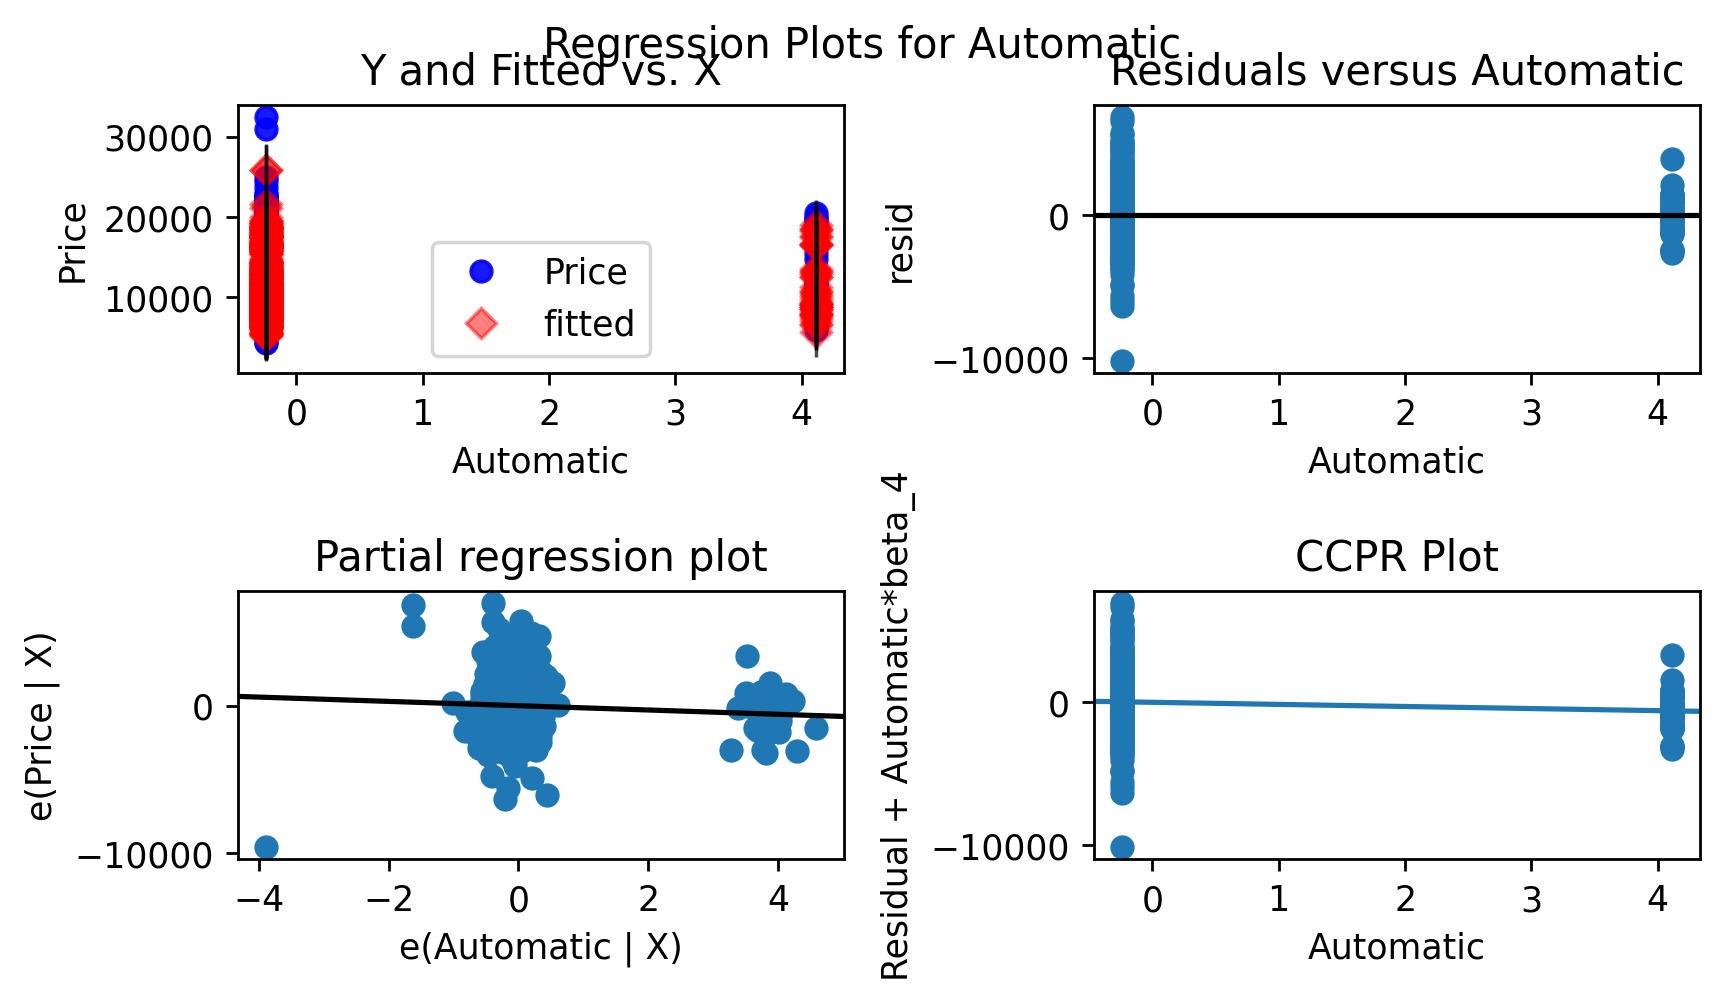

In [191]:
sm.graphics.plot_regress_exog(model, 'Automatic')

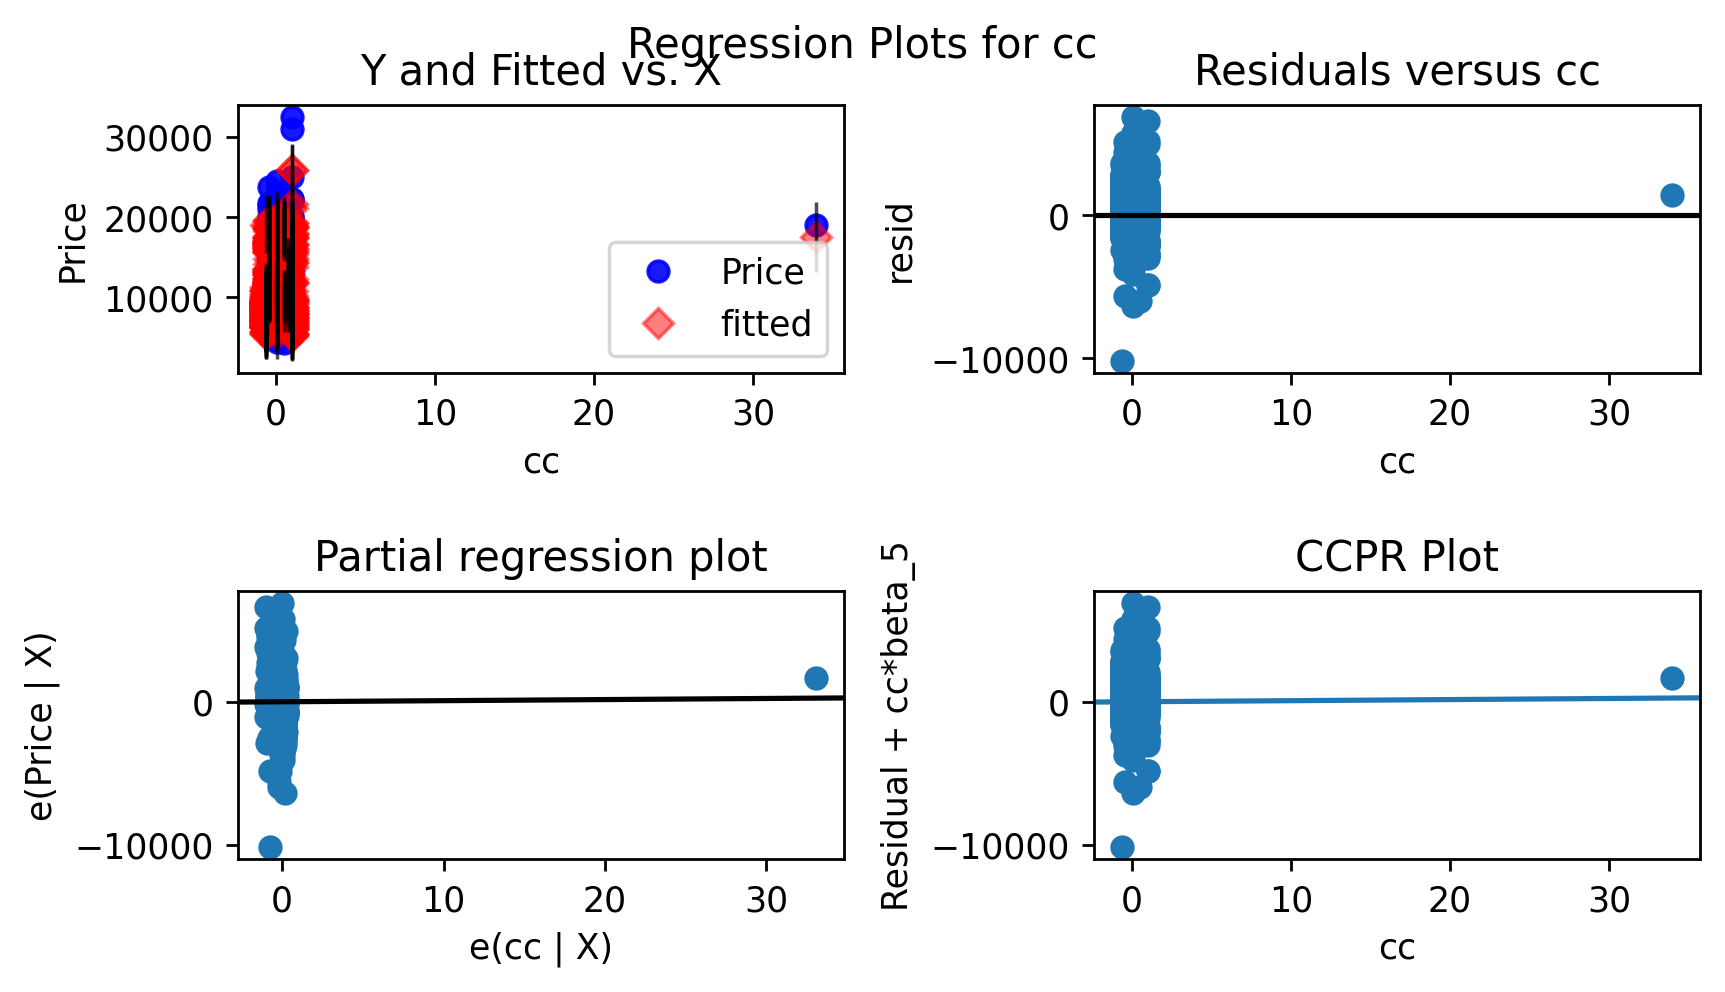

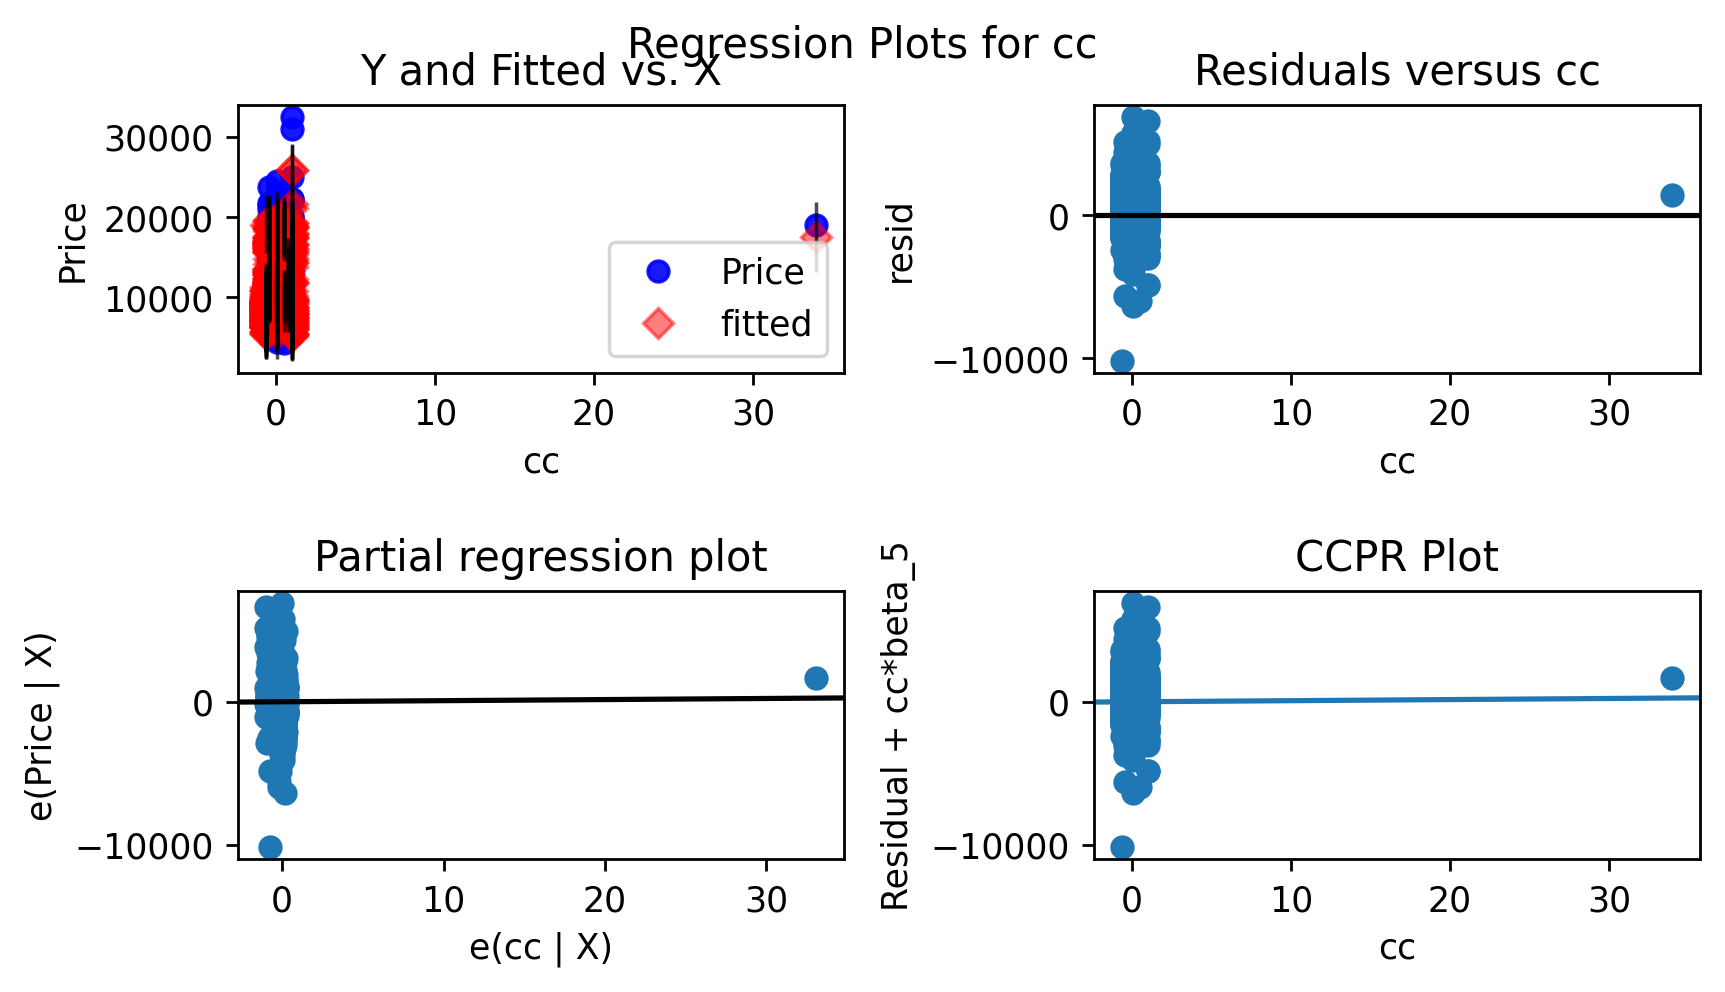

In [192]:
sm.graphics.plot_regress_exog(model, 'cc')

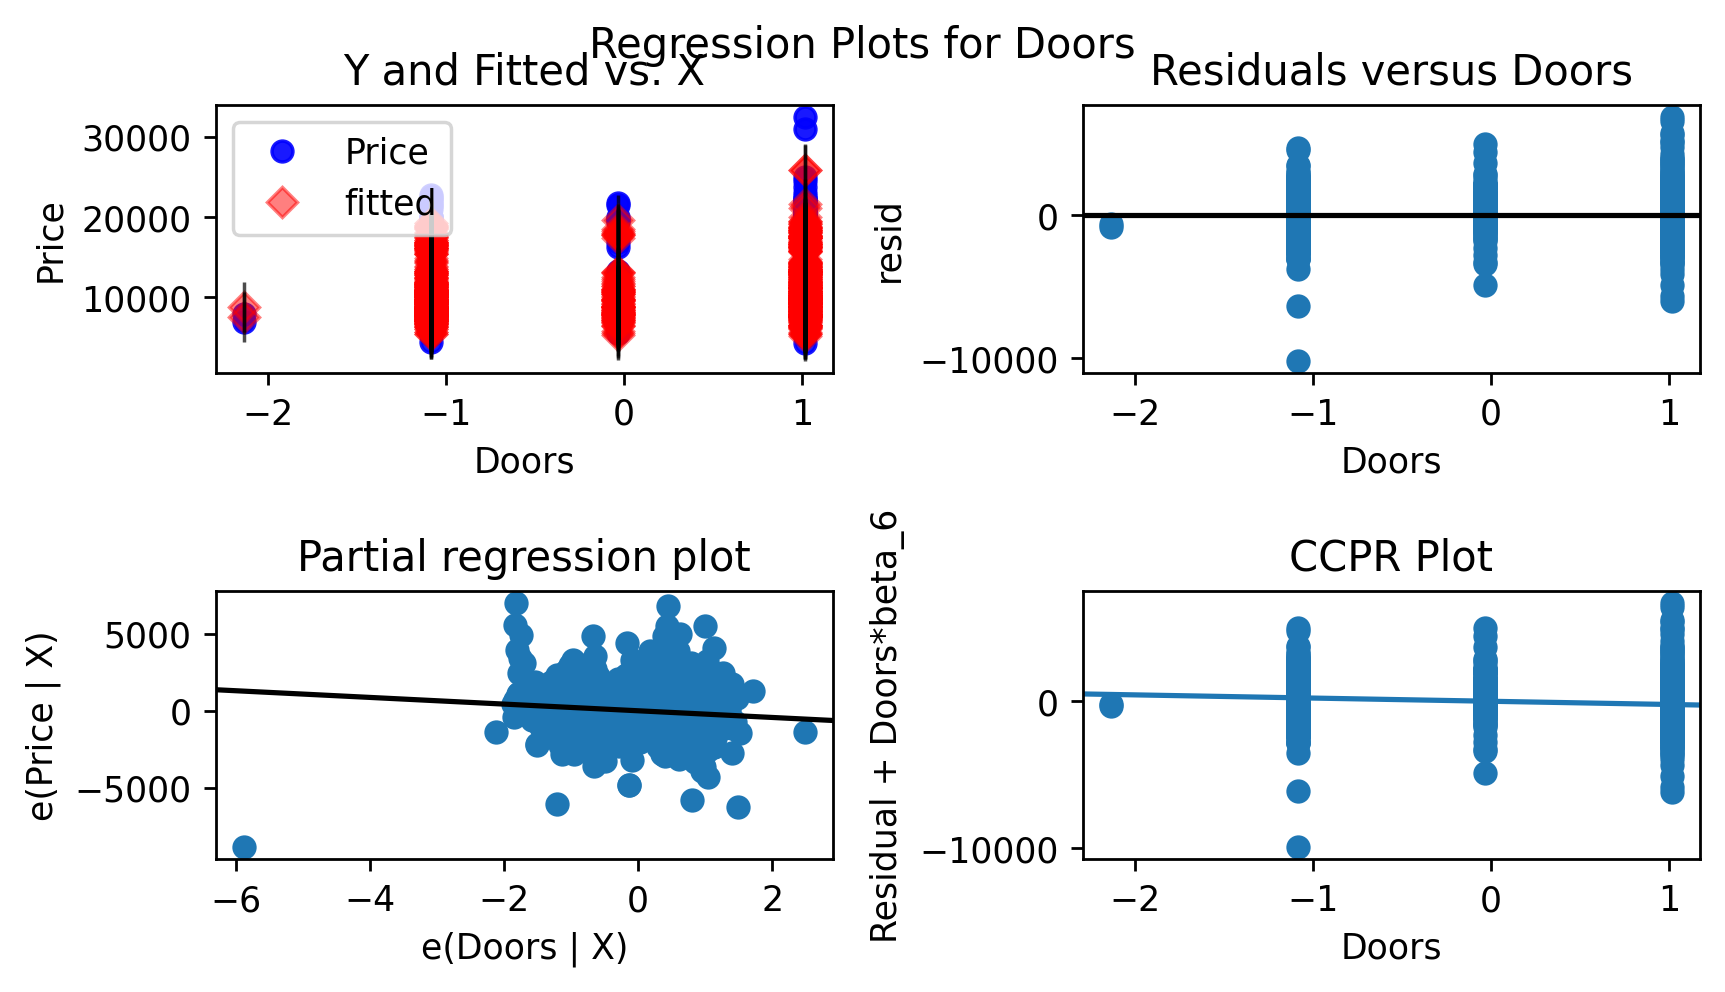

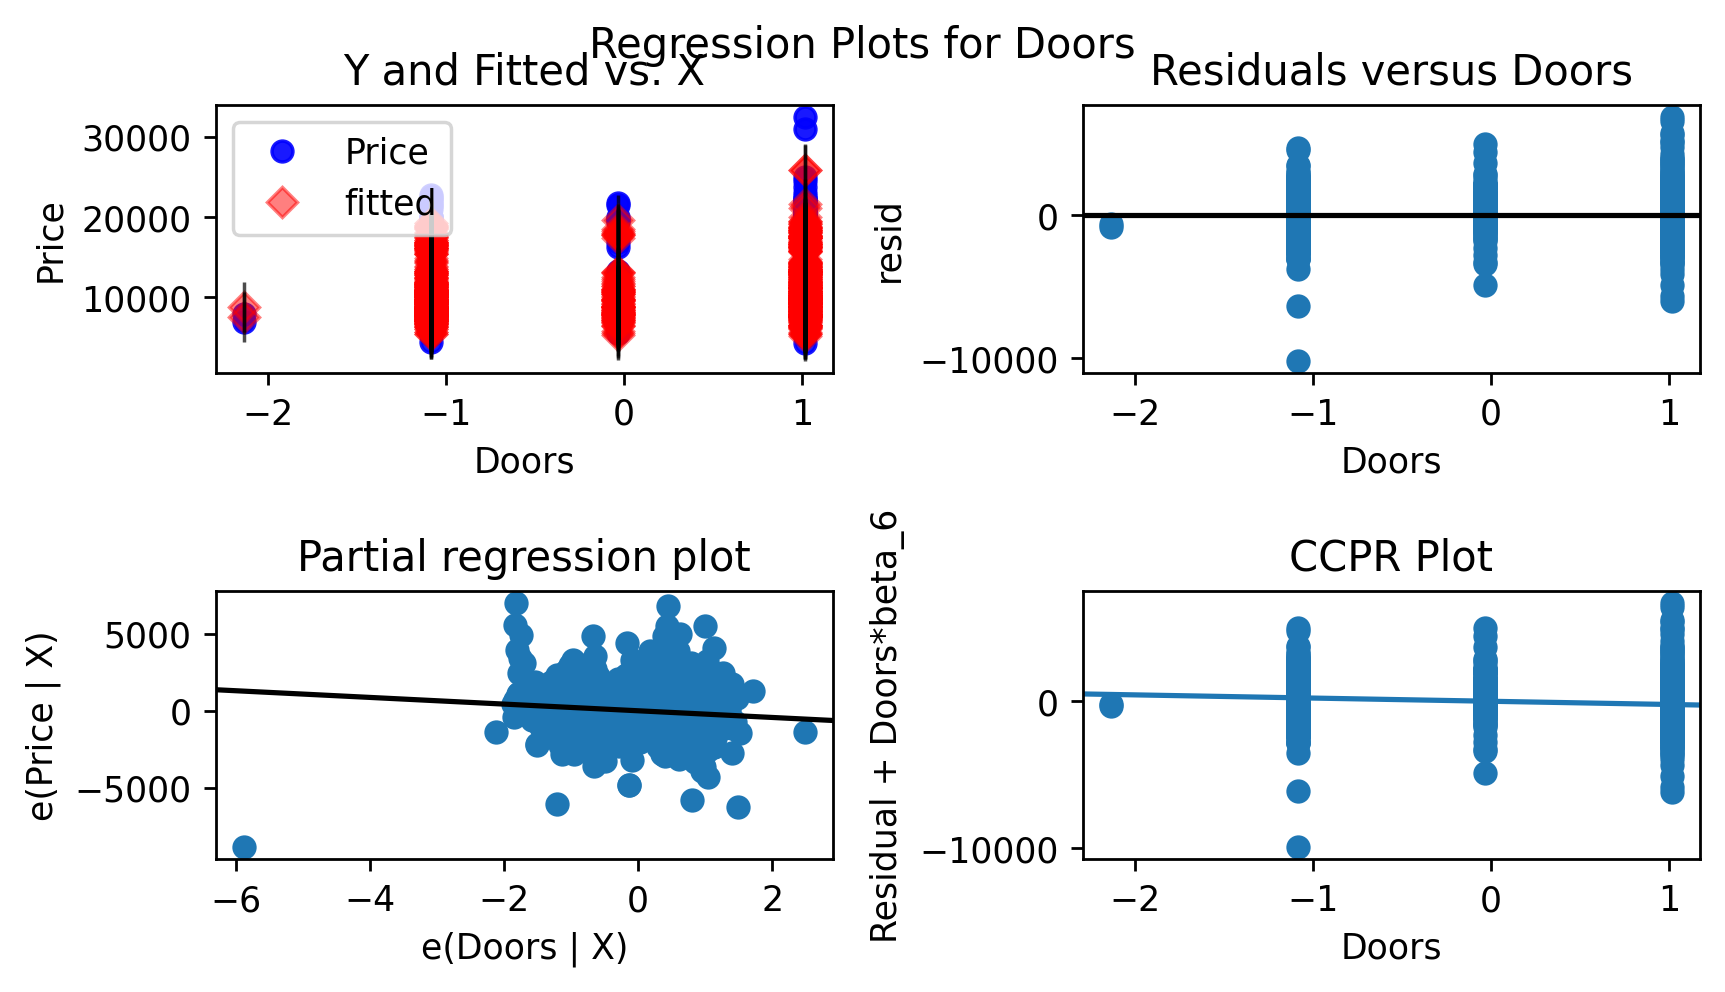

In [193]:
sm.graphics.plot_regress_exog(model, 'Doors')

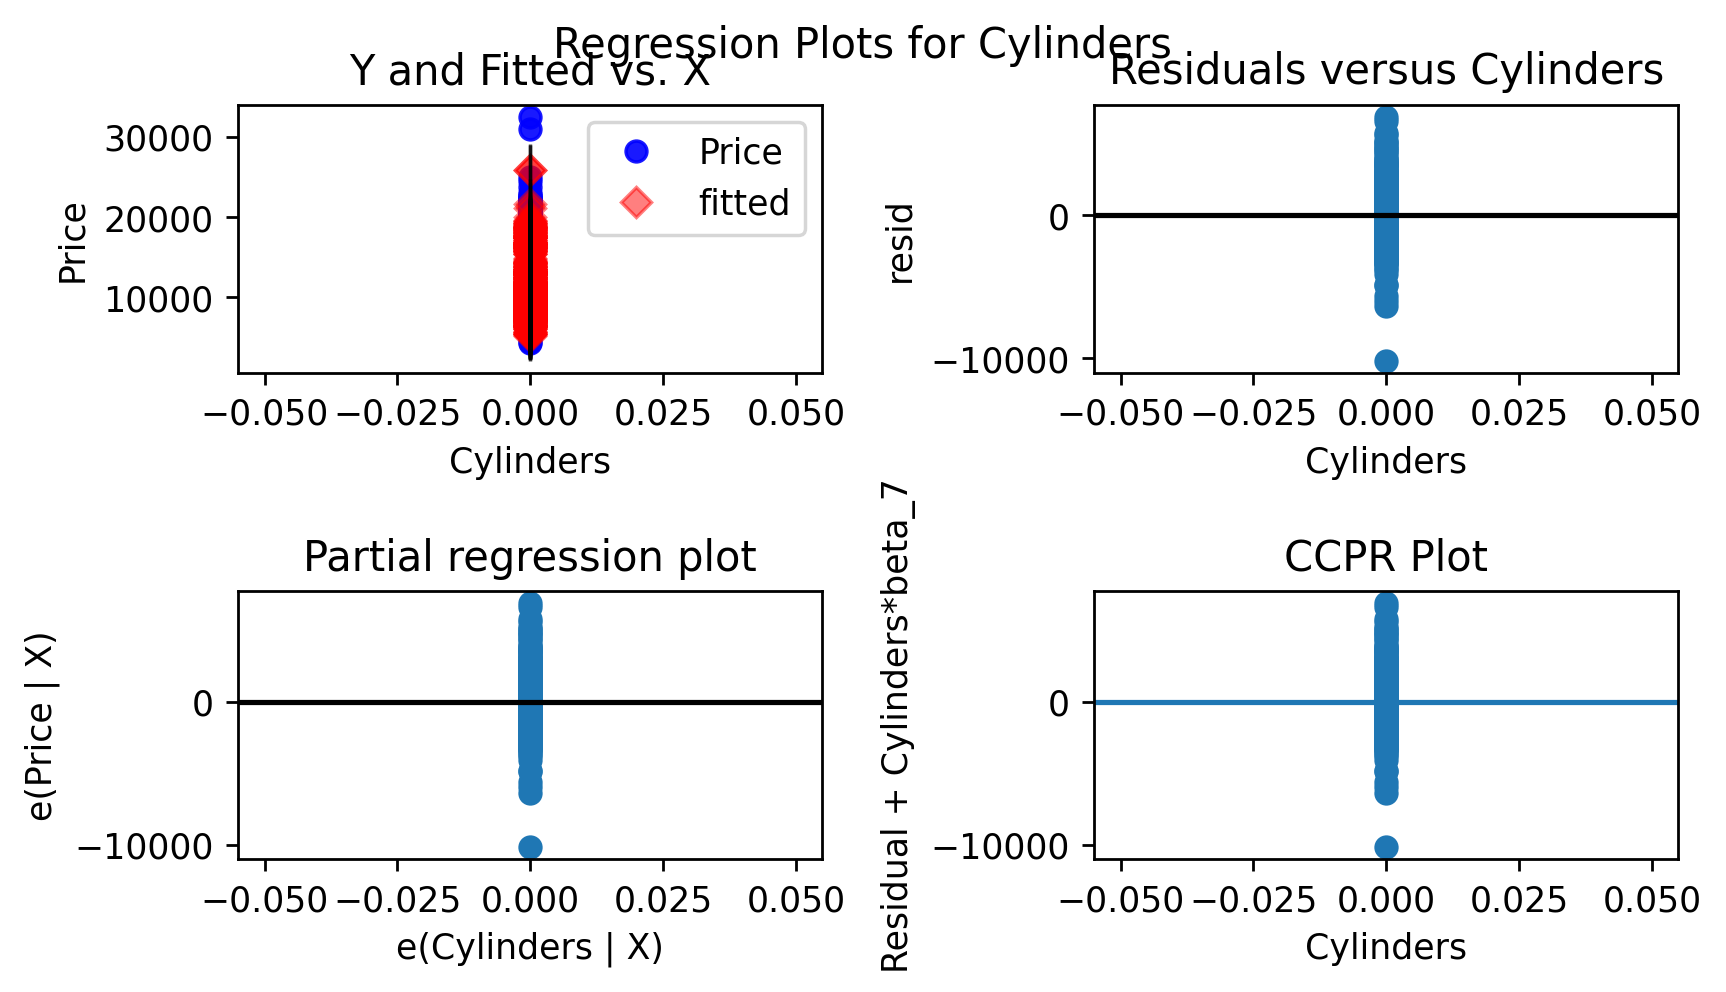

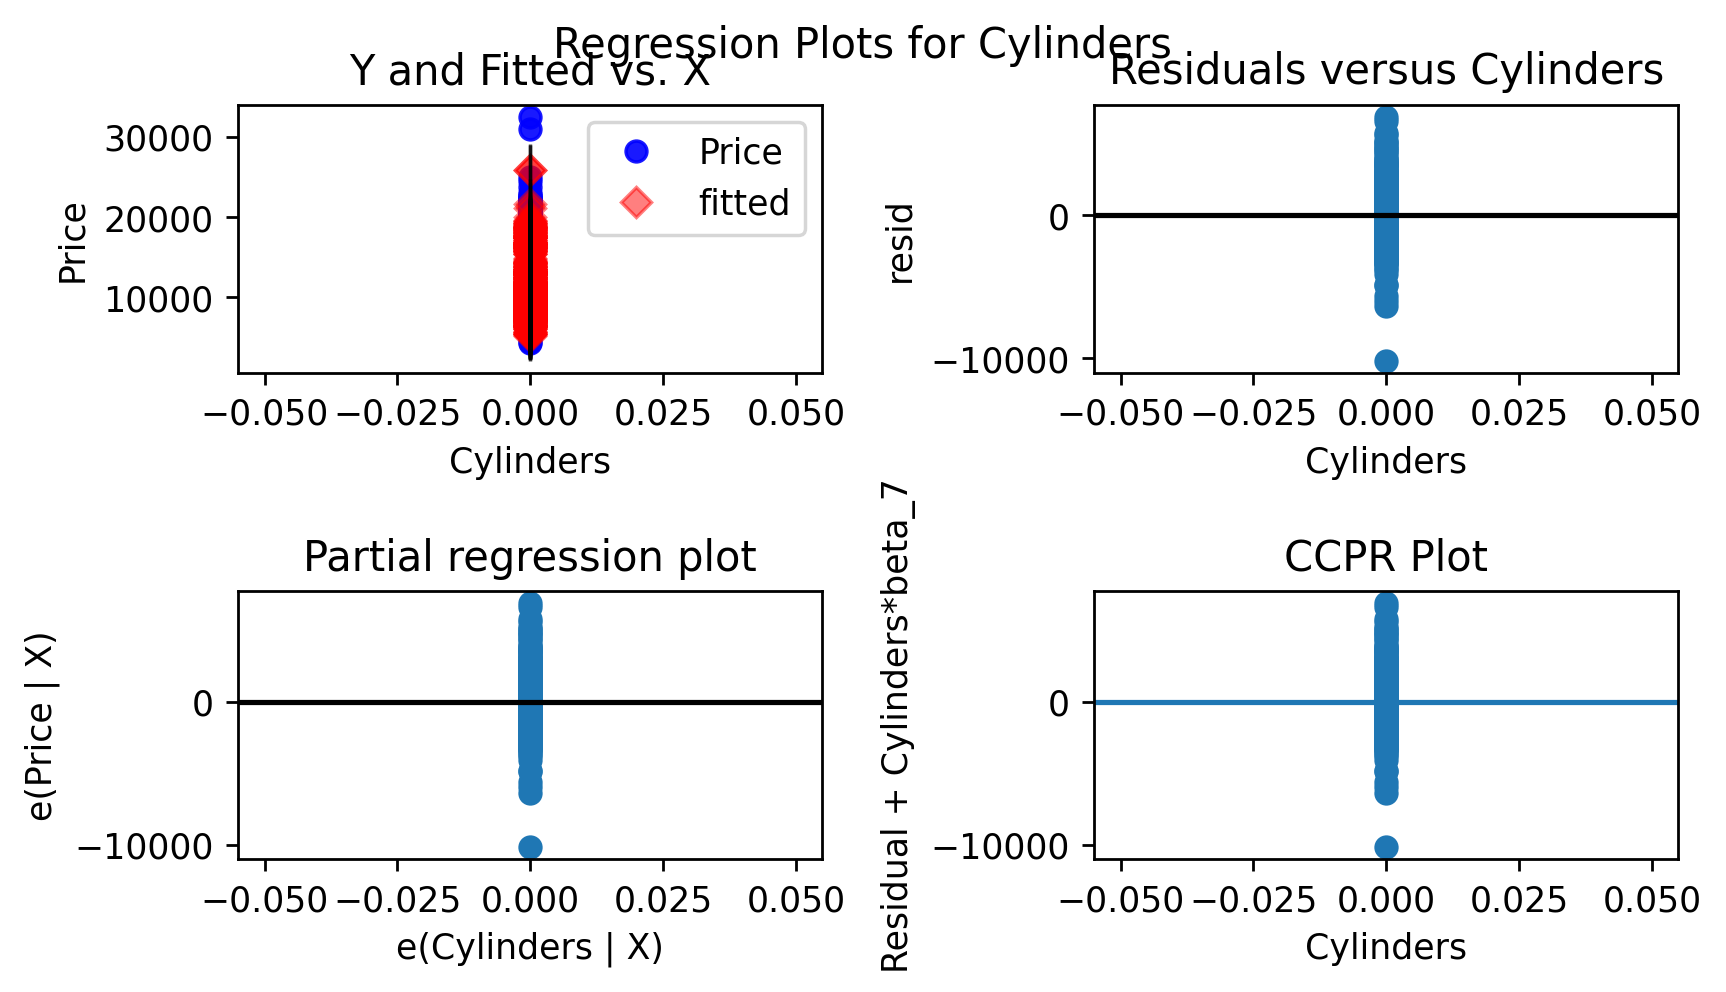

In [194]:
sm.graphics.plot_regress_exog(model, 'Cylinders')

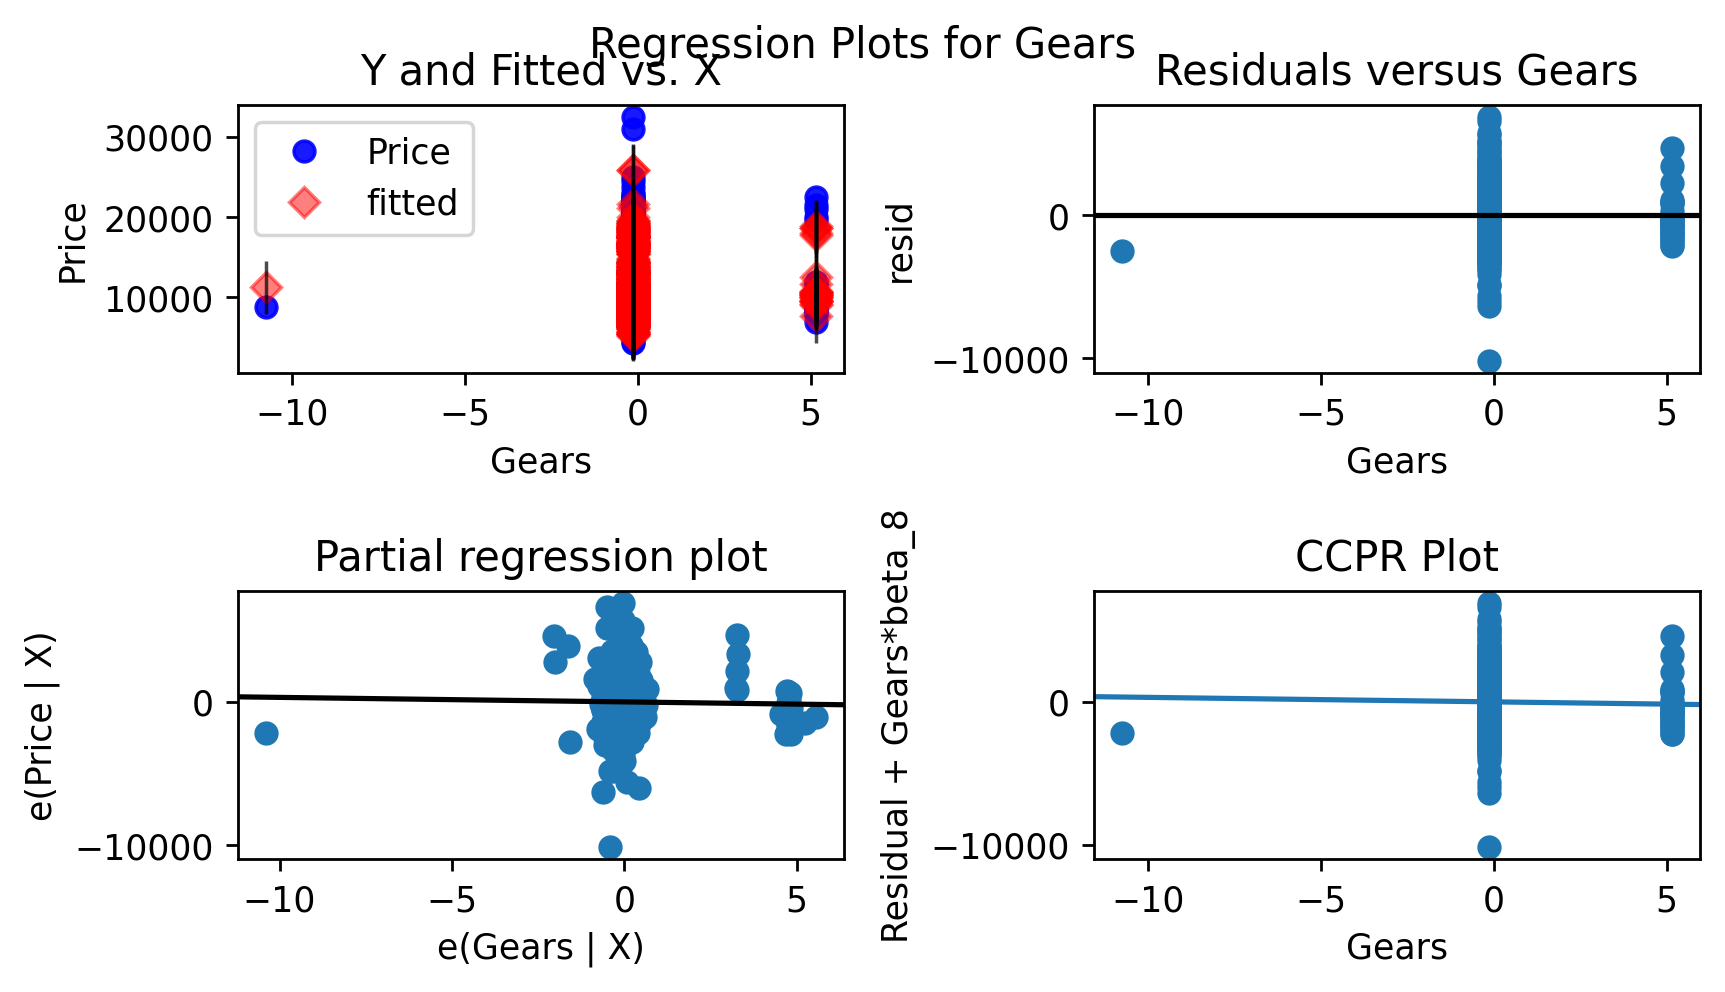

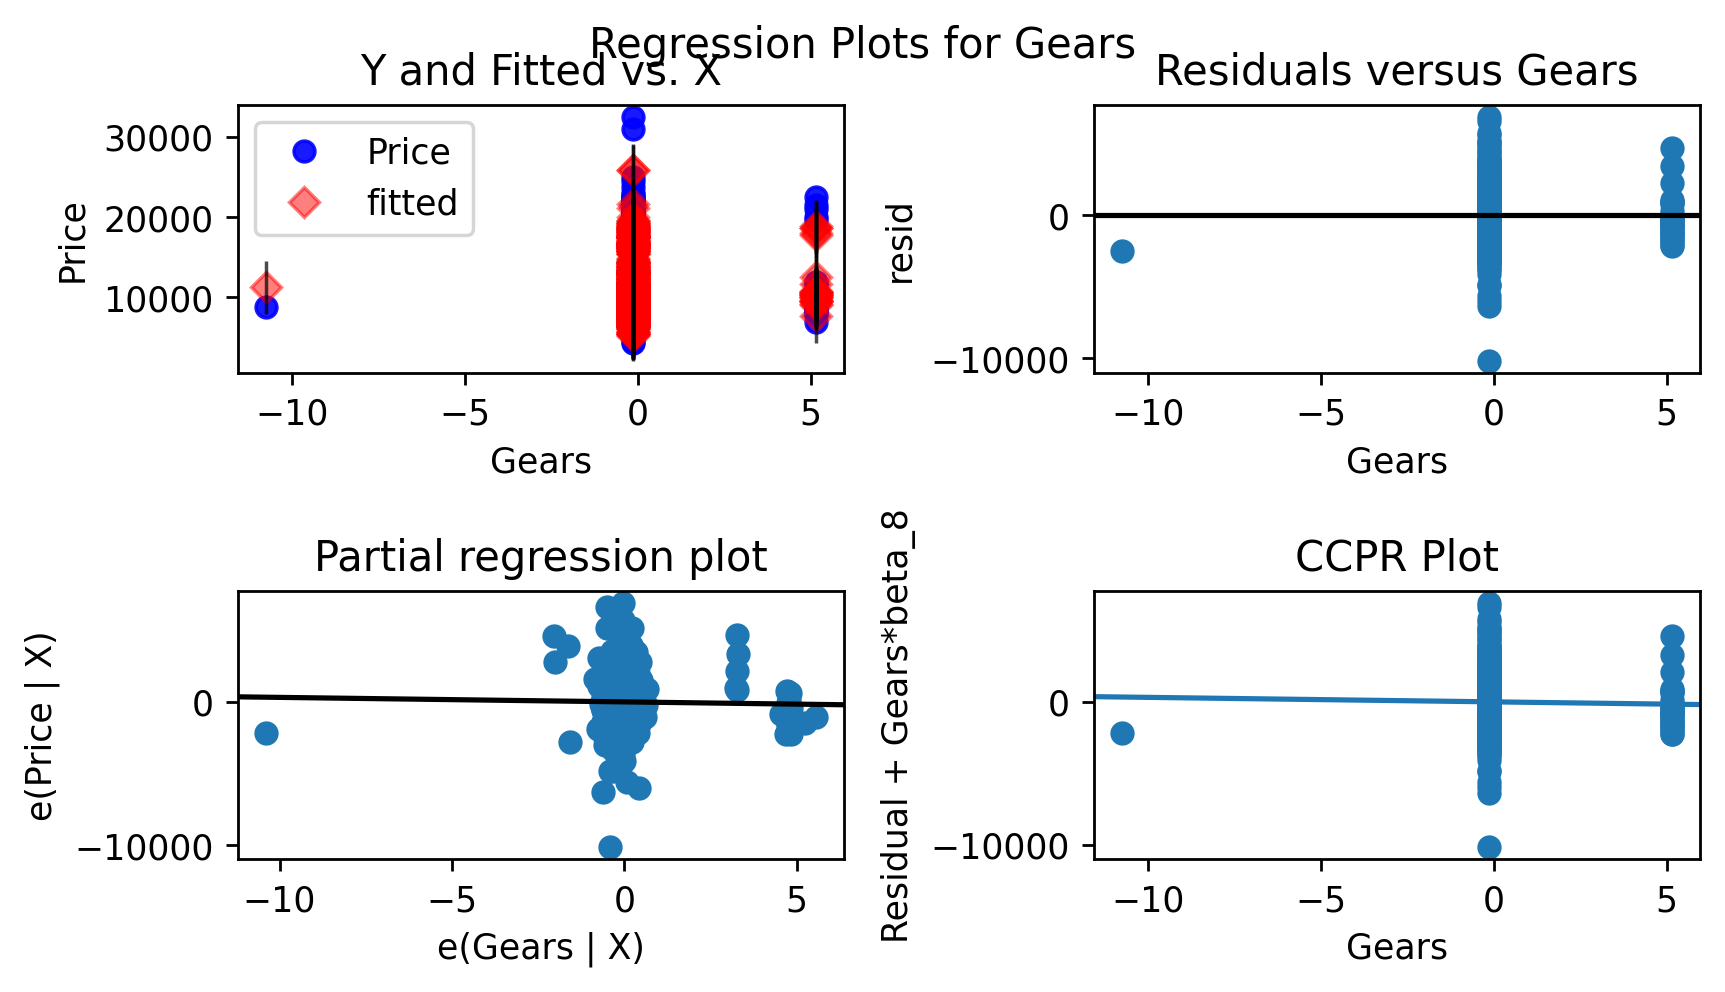

In [195]:
sm.graphics.plot_regress_exog(model, 'Gears')

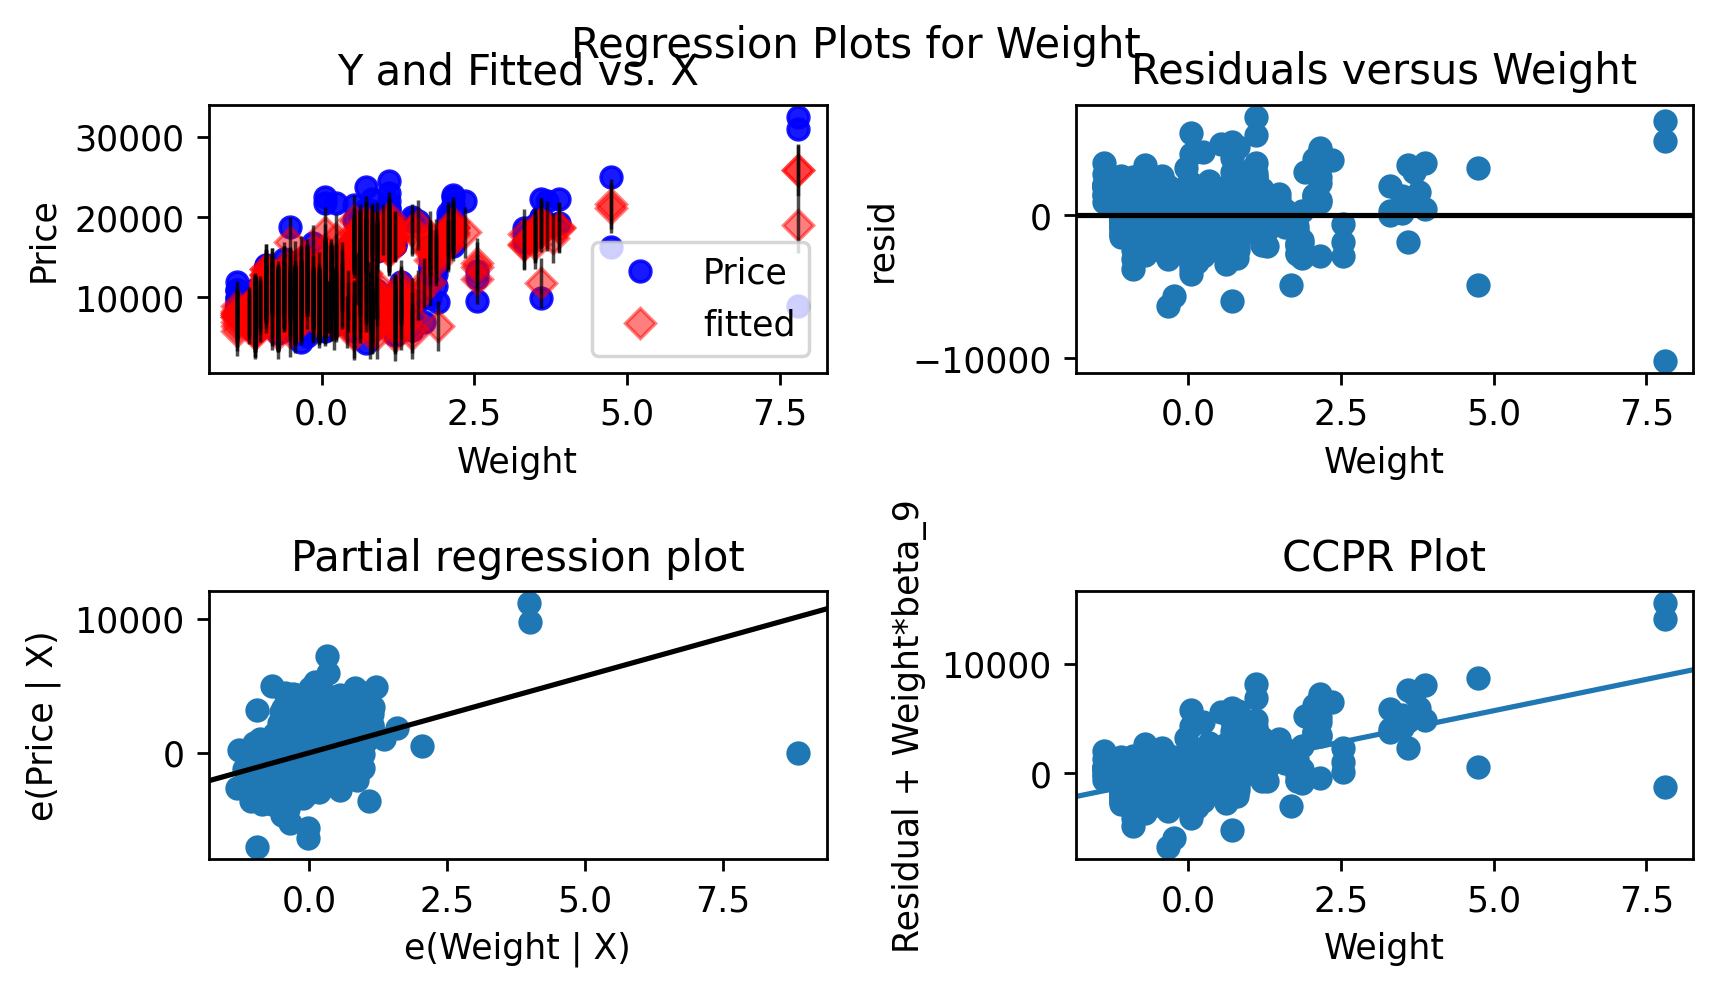

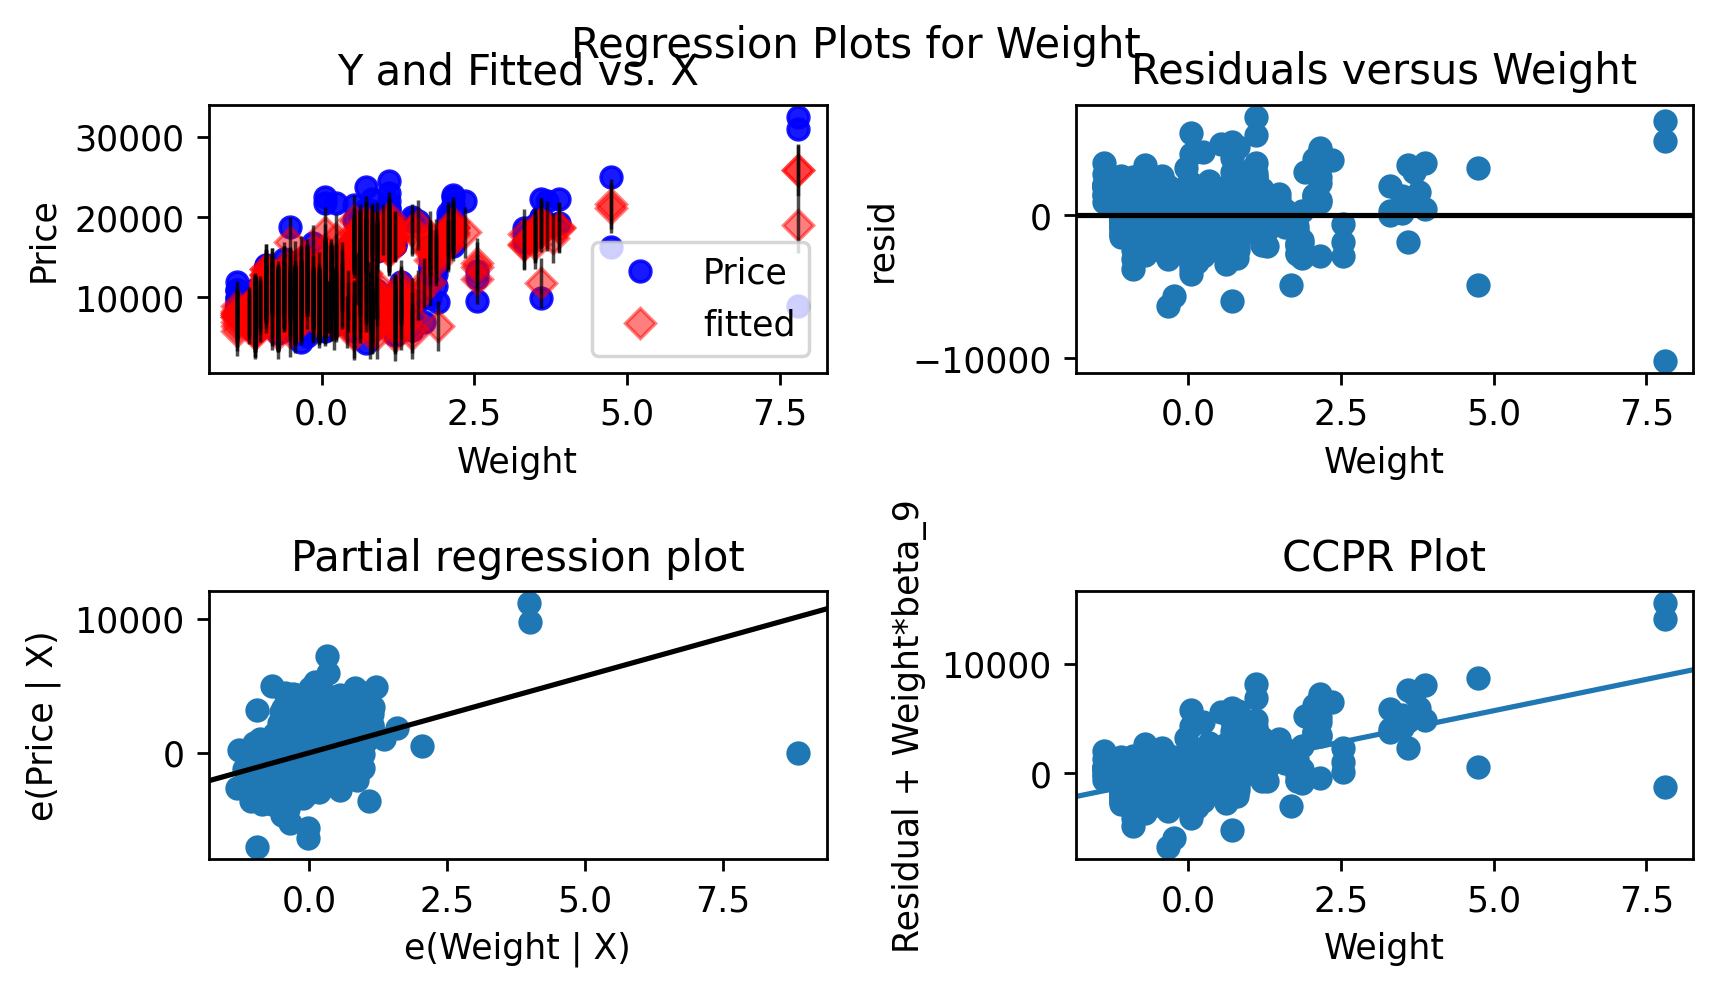

In [196]:
sm.graphics.plot_regress_exog(model, 'Weight')

### conclusion(interpretation) of testing of assumptions of error datapoints by these 3 types of plots(qqplot, scatterplot, plot_regress_exog)

#### 1.     there is not homoscedasticity due to presence of outlier datapoints

#### 2.     error data points are not following IID distribution because of 2 outlier datapoints

#### 3.     third assumption is getting satisfied:  mean = 0

# GETTING PREDICTION on testing data

In [197]:
xtest

Age_08_04        KM        HP  Automatic        cc     Doors  Cylinders  \
752    0.162717  0.316405  0.568103  -0.242983  0.055249 -1.084443        0.0   
857    0.324382 -0.100720  0.568103  -0.242983  0.055249  1.015659        0.0   
629    0.162717  1.639046 -1.969259  -0.242983  0.998113 -0.034392        0.0   
1411   0.701602 -0.687650  0.568103  -0.242983  0.055249 -1.084443        0.0   
974    0.486048 -0.575211 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
...         ...       ...       ...        ...       ...       ...        ...   
1112   0.917156  1.262212  0.568103  -0.242983  0.055249 -0.034392        0.0   
174   -2.585595 -1.600879  0.568103  -0.242983  0.055249  1.015659        0.0   
1427   0.863267 -1.135913 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
297   -1.130607 -0.735679  0.568103  -0.242983  0.055249  1.015659        0.0   
1125   1.294375  1.105400  0.568103  -0.242983  0.055249 -0.034392        0.0   

         Gears    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
752   5.164307 -0.139510      -0.109493         -0.346726          0.367811  
857  -0.140475  0.051938      -0.109493         -0.346726          0.367811  
629  -0.140475  1.200622      -0.109493          2.884126         -2.718789  
1411 -0.140475 -0.426681      -0.109493         -0.346726          0.367811  
974  -0.140475 -1.096747      -0.109493         -0.346726          0.367811  
...        ...       ...            ...               ...               ...  
1112 -0.140475 -0.713852      -0.109493         -0.346726          0.367811  
174  -0.140475  1.104898      -0.109493         -0.346726          0.367811  
1427 -0.140475 -1.096747      -0.109493         -0.346726          0.367811  
297  -0.140475  0.051938      -0.109493         -0.346726          0.367811  
1125 -0.140475 -0.713852      -0.109493         -0.346726          0.367811  

[287 rows x 12 columns]

In [198]:
model.predict(xtest)       #getting predictions on testing data from model

752     10394.764503
857     10178.971708
629      9217.519037
1411     9527.457265
974      9038.099533
            ...     
1112     7340.798460
174     19159.414279
1427     8462.952021
297     14000.154589
1125     6534.266134
Length: 287, dtype: float64

In [199]:
ypred = pd.DataFrame(model.predict(xtest), columns=['Predicted_Price'])
ypred

Predicted_Price
752      10394.764503
857      10178.971708
629       9217.519037
1411      9527.457265
974       9038.099533
...               ...
1112      7340.798460
174      19159.414279
1427      8462.952021
297      14000.154589
1125      6534.266134

[287 rows x 1 columns]

In [200]:
# using sklearn liberary for calculating accuracy of the model on testing data

In [201]:
from sklearn.metrics import r2_score

In [202]:
accuracy = r2_score(ytest, ypred)
accuracy

0.8279004468253449

In [203]:
print(f'on training data accuracy of model is :  {accuracy}')

on training data accuracy of model is :  0.8279004468253449


In [204]:
# for my own understanding

In [205]:
final_observation = pd.concat([xtest, ypred], axis=1)
final_observation

Age_08_04        KM        HP  Automatic        cc     Doors  Cylinders  \
752    0.162717  0.316405  0.568103  -0.242983  0.055249 -1.084443        0.0   
857    0.324382 -0.100720  0.568103  -0.242983  0.055249  1.015659        0.0   
629    0.162717  1.639046 -1.969259  -0.242983  0.998113 -0.034392        0.0   
1411   0.701602 -0.687650  0.568103  -0.242983  0.055249 -1.084443        0.0   
974    0.486048 -0.575211 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
...         ...       ...       ...        ...       ...       ...        ...   
1112   0.917156  1.262212  0.568103  -0.242983  0.055249 -0.034392        0.0   
174   -2.585595 -1.600879  0.568103  -0.242983  0.055249  1.015659        0.0   
1427   0.863267 -1.135913 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
297   -1.130607 -0.735679  0.568103  -0.242983  0.055249  1.015659        0.0   
1125   1.294375  1.105400  0.568103  -0.242983  0.055249 -0.034392        0.0   

         Gears    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  \
752   5.164307 -0.139510      -0.109493         -0.346726          0.367811   
857  -0.140475  0.051938      -0.109493         -0.346726          0.367811   
629  -0.140475  1.200622      -0.109493          2.884126         -2.718789   
1411 -0.140475 -0.426681      -0.109493         -0.346726          0.367811   
974  -0.140475 -1.096747      -0.109493         -0.346726          0.367811   
...        ...       ...            ...               ...               ...   
1112 -0.140475 -0.713852      -0.109493         -0.346726          0.367811   
174  -0.140475  1.104898      -0.109493         -0.346726          0.367811   
1427 -0.140475 -1.096747      -0.109493         -0.346726          0.367811   
297  -0.140475  0.051938      -0.109493         -0.346726          0.367811   
1125 -0.140475 -0.713852      -0.109493         -0.346726          0.367811   

      Predicted_Price  
752      10394.764503  
857      10178.971708  
629       9217.519037  
1411      9527.457265  
974       9038.099533  
...               ...  
1112      7340.798460  
174      19159.414279  
1427      8462.952021  
297      14000.154589  
1125      6534.266134  

[287 rows x 13 columns]

# drop outliers

In [206]:
df_error

error
959 -10154.731378
393  -6346.629195
191  -5968.010735
402  -5613.912062
186  -4853.942731
..            ...
110   5175.039839
138   5597.733691
125   5752.625788
109   6613.910958
147   6898.264676

[930 rows x 1 columns]

In [207]:
train_data.drop(960, axis=0, inplace=True)
train_data.drop(601, axis=0, inplace=True)

train_data

Age_08_04        KM        HP  Automatic        cc     Doors  Cylinders  \
1127   1.186598  1.085735  0.568103  -0.242983  0.055249  1.015659        0.0   
898    0.324382 -0.247526 -1.034441  -0.242983 -0.651898  1.015659        0.0   
1187   0.809379  0.581627 -1.034441  -0.242983 -0.651898  1.015659        0.0   
310   -0.645610 -0.803425  0.568103  -0.242983  0.055249  1.015659        0.0   
1144   1.024933  0.888073  0.568103  -0.242983  0.055249  1.015659        0.0   
...         ...       ...       ...        ...       ...       ...        ...   
316         NaN       NaN       NaN        NaN       NaN       NaN        NaN   
857         NaN       NaN       NaN        NaN       NaN       NaN        NaN   
1338        NaN       NaN       NaN        NaN       NaN       NaN        NaN   
277         NaN       NaN       NaN        NaN       NaN       NaN        NaN   
344         NaN       NaN       NaN        NaN       NaN       NaN        NaN   

         Gears    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  \
1127 -0.140475 -0.043786      -0.109493         -0.346726          0.367811   
898  -0.140475 -0.713852      -0.109493         -0.346726          0.367811   
1187 -0.140475 -0.713852      -0.109493         -0.346726          0.367811   
310  -0.140475  0.147661      -0.109493         -0.346726          0.367811   
1144 -0.140475 -0.043786      -0.109493         -0.346726          0.367811   
...        ...       ...            ...               ...               ...   
316        NaN       NaN            NaN               NaN               NaN   
857        NaN       NaN            NaN               NaN               NaN   
1338       NaN       NaN            NaN               NaN               NaN   
277        NaN       NaN            NaN               NaN               NaN   
344        NaN       NaN            NaN               NaN               NaN   

        Price  
1127   8700.0  
898    8950.0  
1187   7450.0  
310   12950.0  
1144   7750.0  
...       ...  
316   12950.0  
857    8500.0  
1338   7499.0  
277   11495.0  
344   12950.0  

[1364 rows x 13 columns]

## model 2

In [208]:
model1 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol', data=train_data).fit()

In [209]:
model1.rsquared

0.8307050780606464

In [210]:
# accuracy increased by more than 1 precentage: from 0.8702 to 0.8875

In [211]:
model1.predict(xtest)

752     10394.469637
857     10182.565379
629      9216.760821
1411     9542.306824
974      9054.806128
            ...     
1112     7341.186348
174     19165.269593
1427     8484.215747
297     14007.471911
1125     6536.135974
Length: 287, dtype: float64

In [212]:
from sklearn.metrics import r2_score

In [213]:
accuracy1 = r2_score(ytest, ypred)
accuracy1

0.8279004468253449

### MODEL3

In [214]:
# if I train regression model on testing data to check the accuracy of model then

In [215]:
test_data = pd.concat([xtest, ytest], axis=1)
test_data

Age_08_04        KM        HP  Automatic        cc     Doors  Cylinders  \
752    0.162717  0.316405  0.568103  -0.242983  0.055249 -1.084443        0.0   
857    0.324382 -0.100720  0.568103  -0.242983  0.055249  1.015659        0.0   
629    0.162717  1.639046 -1.969259  -0.242983  0.998113 -0.034392        0.0   
1411   0.701602 -0.687650  0.568103  -0.242983  0.055249 -1.084443        0.0   
974    0.486048 -0.575211 -1.034441  -0.242983 -0.651898 -1.084443        0.0   
...         ...       ...       ...        ...       ...       ...        ...   
528         NaN       NaN       NaN        NaN       NaN       NaN        NaN   
1113        NaN       NaN       NaN        NaN       NaN       NaN        NaN   
1428        NaN       NaN       NaN        NaN       NaN       NaN        NaN   
298         NaN       NaN       NaN        NaN       NaN       NaN        NaN   
1126        NaN       NaN       NaN        NaN       NaN       NaN        NaN   

         Gears    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  \
752   5.164307 -0.139510      -0.109493         -0.346726          0.367811   
857  -0.140475  0.051938      -0.109493         -0.346726          0.367811   
629  -0.140475  1.200622      -0.109493          2.884126         -2.718789   
1411 -0.140475 -0.426681      -0.109493         -0.346726          0.367811   
974  -0.140475 -1.096747      -0.109493         -0.346726          0.367811   
...        ...       ...            ...               ...               ...   
528        NaN       NaN            NaN               NaN               NaN   
1113       NaN       NaN            NaN               NaN               NaN   
1428       NaN       NaN            NaN               NaN               NaN   
298        NaN       NaN            NaN               NaN               NaN   
1126       NaN       NaN            NaN               NaN               NaN   

        Price  
752       NaN  
857       NaN  
629       NaN  
1411      NaN  
974       NaN  
...       ...  
528   10500.0  
1113   5750.0  
1428   8450.0  
298   13995.0  
1126   6800.0  

[505 rows x 13 columns]

In [216]:
model2 = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol', data=test_data).fit()

In [217]:
model2.rsquared

0.9392823827862118

In [218]:
print(f'accuracy of this model is:   {model2.rsquared}')

accuracy of this model is:   0.9392823827862118


# Interview Questions:
## 1.What is Normalization & Standardization and how is it helpful?
#NORMALIZATION:
Normalization is a scaling technique that transforms data to a specific range, usually between 0 and 1.
#formula:
## norm(x) = (X - X_min) / (X_max - X_min)
## X_norm is the normalized value
## X is the original value
## X_min is the minimum value of the feature
## X_max is the maximum value of the feature
BEFITS:
## Improves model performance when features have different scales, preventing features with larger values from dominating the model.
## Makes the model less sensitive to outliers and enhancing its robustness.
## it Can be used with those algorithms that are sensitive to the scale of features, such as k-nearest neighbors and neural networks.

# STANDARDIZATION:
## Standardization is another scaling technique that transforms data to have zero(0) mean and standard deviation of 1. It centers the data around zero by subtracting the mean and scales it by dividing by the standard deviation.
## formula:
std(x) = (X - X_mean) / X_std
## X_std is the standardized value
## X is the original value
## X_mean is the mean of the feature
## X_std is the standard deviation of the feature
#Benifits:
## Useful for algorithms that assume data is normally distributed, such as linear regression and logistic regression.
## Handles outliers better than normalization, as it reduces the influence of extreme values.
## Can improve the convergence speed of optimization algorithms by ensuring that all features have a similar range of values.

# ## 2.What techniques can be used to address multicollinearity in multiple linear regression?

## we can use pps score and correlation metrix to find out the relationship between the columns and we if there is multicolinearity between independent features then we can use VIF(variance inflation factor) to deal with multicolinearity like which column is needed to droped and which column to keep for model building.